# Assignment  Module 5: 

# Click Through Rate Prediction Assignment
### An important exercise marketing companies need to do before making any of the above decisions is a click-through rate (CTR) prediction. The objective is to predict whether the audience will click on an ad or not and thus help the marketing team answer ad placement-related questions. In online advertising, CTR is a very important metric for evaluating ad performance. CTR prediction systems are thus essential and widely used for sponsored search and real-time bidding. 

## We will run 3 models 
### a. Logistic regression for interpretability and finding linear relationship
### b. Decision tree classifier for interpretability and also for non-linear relation
### c. Ensemble model techniques with Random forest classifier for accuracy and improving the model


##### Created By -  Prithviraj Patil

# Step 1: Reading and Understanding the Data
 Let's start with the following steps:
 1. Importing data using the pandas library.Few libraries have been imported as and when required
 2. Understanding the structure of the data

In [1]:
# Import the numpy and pandas package 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import sklearn.model_selection
import statsmodels.api as sm

pd.set_option('display.max_columns', None)

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Read the given CSV file, and view some sample records
data_desc = pd.read_csv("Data+Description+-+Sheet1.csv")
df_data = pd.read_csv("data.csv")

In [4]:
data_desc

,Variable,Description
0,click:,0/1 for non-click/click
1,"hour: format is YYMMDDHH, so 14091123 means 23...",NaN
2,C1,anonymized categorical variable
3,banner_pos,position of the ad/banner on the page
4,site_id,unique id of the site on which the ad is shown
5,site_domain,unique domain of the site on which the ad is s...
6,site_category,category of the site on which the ad is shown
7,app_id,app id of the site on which the ad is shown
8,app_domain,app category of the site on which the ad is shown
9,app_category,category id of the site on which the ad is shown


In [5]:
#Obtaining the Column headers
df_data.columns

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour',
       'y'],
      dtype='object')

In [6]:
df_data.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,1b13b020,1,0,17037,320,50,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,9a45a8e8,1,0,22155,320,50,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,ea6abc60,0,0,21591,320,50,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,36d749e5,1,0,15708,320,50,1722,0,35,-1,79,10,1,21,8,1


Let's inspect the various aspects of our dataframe

In [7]:
df_data.shape

(99999, 27)

In [8]:
# CHECK FOR MISSING VALUES
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

## No Missing Values as per above result in the data set

In [9]:
# CHECK FOR NULL VALUES

df_data.isnull().sum().sort_values(ascending=False)

click               0
C14                 0
hour                0
day                 0
dayofweek           0
month               0
C21                 0
C20                 0
C19                 0
C18                 0
C17                 0
C16                 0
C15                 0
device_conn_type    0
C1                  0
device_type         0
device_model        0
device_ip           0
device_id           0
app_category        0
app_domain          0
app_id              0
site_category       0
site_domain         0
site_id             0
banner_pos          0
y                   0
dtype: int64

In [10]:
df_data['click'].describe()

count     99999
unique        2
top       False
freq      83019
Name: click, dtype: object

In [11]:
# Change boolean values for click to Integer
df_data.click = df_data.click.replace({True: 1, False: 0})

In [12]:
df_data['click'].head()

0    0
1    1
2    0
3    0
4    1
Name: click, dtype: int64

## From the data description provided to us, we know that click=0 means the ad was not clicked, and click=1 means the ad was clicked.

In [13]:
#pip install pandas-summary

In [14]:
from pandas_summary import DataFrameSummary

df_s = DataFrameSummary(df_data)
df_s.columns_types

numeric        15
categorical     9
bool            2
constant        1
Name: types, dtype: int64

In [15]:
df_data.dtypes

click                int64
C1                   int64
banner_pos           int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
month                int64
dayofweek            int64
day                  int64
hour                 int64
y                    int64
dtype: object

## If we look at our data types, we can see that all of our variables are not numerical — we have some categorical variables (ones with type = object).

In [16]:
# Statistical summary for the numerical variables 
df_data.describe()

,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99999.000000,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.169802,1004.967550,0.289943,1.01639,0.329453,18857.231732,318.834548,60.278743,2114.613036,1.439904,227.234932,53292.001950,83.163542,10.0,2.592836,25.485755,11.300673,0.169802
std,0.375460,1.091916,0.505707,0.53110,0.854673,4944.919482,21.510752,47.713436,607.469442,1.326824,351.472366,49952.340367,70.161076,0.0,1.723003,2.968520,5.938725,0.375460
min,0.000000,1001.000000,0.000000,0.00000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,10.0,0.000000,21.000000,0.000000,0.000000
25%,0.000000,1005.000000,0.000000,1.00000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,10.0,1.000000,23.000000,7.000000,0.000000
50%,0.000000,1005.000000,0.000000,1.00000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000,10.0,2.000000,26.000000,11.000000,0.000000
75%,0.000000,1005.000000,1.000000,1.00000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100093.000000,101.000000,10.0,4.000000,28.000000,16.000000,0.000000
max,1.000000,1012.000000,7.000000,5.00000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,10.0,6.000000,30.000000,23.000000,1.000000


## From the mean value observer "click" column,  we can see that the number of ads clicked was 16.98% — value of "click" can only be 0 or 1, so the mean value is also the click ratio.

## Check for outliers

In [17]:
# Dealing with outliers by capping
col = ['C15', 'C16', 'C19', 'C21']
for col in col:
    percentiles = df_data[col].quantile(0.98)
    if df_data[col].quantile(0.98) < 0.5 * df_data[col].max():
        df_data[col][df_data[col] >= percentiles] = percentiles

In [18]:
df_s.columns_stats.T

,counts,uniques,missing,missing_perc,types
click,99999,2,0,0%,bool
C1,99999,7,0,0%,numeric
banner_pos,99999,7,0,0%,numeric
site_id,99999,1485,0,0%,categorical
site_domain,99999,1331,0,0%,categorical
site_category,99999,19,0,0%,categorical
app_id,99999,1354,0,0%,categorical
app_domain,99999,96,0,0%,categorical
app_category,99999,21,0,0%,categorical
device_id,99999,16801,0,0%,categorical


## Observations :

### All categorical variables have lot of unique values in it, one hot encoding is not a scalable approach for considering each 
### We will go with target encoding and scaling approach is a better idea for this.

In [19]:
df_data.describe()

,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99999.000000,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.169802,1004.967550,0.289943,1.01639,0.329453,18857.231732,317.998540,59.598856,2114.613036,1.439904,227.234932,53292.001950,83.163542,10.0,2.592836,25.485755,11.300673,0.169802
std,0.375460,1.091916,0.505707,0.53110,0.854673,4944.919482,10.364193,42.891568,607.469442,1.326824,351.472366,49952.340367,70.161076,0.0,1.723003,2.968520,5.938725,0.375460
min,0.000000,1001.000000,0.000000,0.00000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,10.0,0.000000,21.000000,0.000000,0.000000
25%,0.000000,1005.000000,0.000000,1.00000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,10.0,1.000000,23.000000,7.000000,0.000000
50%,0.000000,1005.000000,0.000000,1.00000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000,10.0,2.000000,26.000000,11.000000,0.000000
75%,0.000000,1005.000000,1.000000,1.00000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100093.000000,101.000000,10.0,4.000000,28.000000,16.000000,0.000000
max,1.000000,1012.000000,7.000000,5.00000,5.000000,24043.000000,320.000000,250.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,10.0,6.000000,30.000000,23.000000,1.000000


In [20]:
df_data.C1.value_counts(normalize=True)

1005    0.918629
1002    0.054941
1010    0.022660
1012    0.002540
1007    0.000930
1001    0.000210
1008    0.000090
Name: C1, dtype: float64

In [21]:
df_data.C14.value_counts(normalize=True)

4687     0.02306
21611    0.02192
21189    0.01908
21191    0.01902
19772    0.01827
          ...   
23228    0.00001
23688    0.00001
18859    0.00001
19742    0.00001
16153    0.00001
Name: C14, Length: 1722, dtype: float64

In [22]:
df_data.C15.value_counts(normalize=True)

320    0.933419
300    0.058721
216    0.007760
120    0.000100
Name: C15, dtype: float64

In [23]:
df_data.C16.value_counts(normalize=True)

50     0.942099
250    0.048180
36     0.007760
90     0.001860
20     0.000100
Name: C16, dtype: float64

In [24]:
df_data.C17.value_counts(normalize=True)

1722    0.109911
2424    0.038100
2227    0.036620
1800    0.029530
423     0.023060
          ...   
2525    0.000010
2483    0.000010
2582    0.000010
2592    0.000010
2541    0.000010
Name: C17, Length: 399, dtype: float64

In [25]:
df_data.C18.value_counts(normalize=True)

0    0.416594
3    0.340433
2    0.175632
1    0.067341
Name: C18, dtype: float64

In [26]:
df_data.C19.value_counts(normalize=True)

35      0.299353
39      0.219052
167     0.078321
161     0.039560
47      0.035820
          ...   
939     0.000120
1583    0.000070
683     0.000030
45      0.000030
1195    0.000010
Name: C19, Length: 64, dtype: float64

In [27]:
df_data.C20.value_counts(normalize=True)

-1         0.467675
 100084    0.060711
 100148    0.044050
 100111    0.041430
 100077    0.039150
             ...   
 100109    0.000020
 100043    0.000020
 100137    0.000010
 100175    0.000010
 100010    0.000010
Name: C20, Length: 154, dtype: float64

In [28]:
df_data.C21.value_counts(normalize=True)

23     0.220962
221    0.123521
79     0.112271
48     0.053811
71     0.052681
61     0.050561
157    0.045400
32     0.043830
33     0.037430
52     0.029840
42     0.025490
51     0.021320
15     0.018900
212    0.016400
43     0.013970
229    0.010310
117    0.010160
13     0.009480
16     0.008800
68     0.008500
156    0.008480
159    0.007310
95     0.007000
46     0.005790
246    0.004860
69     0.004630
91     0.004320
17     0.004070
111    0.003860
76     0.003570
171    0.003120
90     0.003070
70     0.003060
110    0.002710
204    0.002410
101    0.002140
112    0.001980
253    0.001830
82     0.001820
100    0.001580
182    0.001310
178    0.001240
108    0.001240
35     0.001050
94     0.000680
251    0.000560
116    0.000350
194    0.000310
20     0.000290
102    0.000270
104    0.000250
93     0.000240
126    0.000240
163    0.000170
195    0.000160
1      0.000120
255    0.000100
177    0.000080
219    0.000070
85     0.000020
Name: C21, dtype: float64

# Step 2: Data Visualization and  Preparation
Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to Sales.

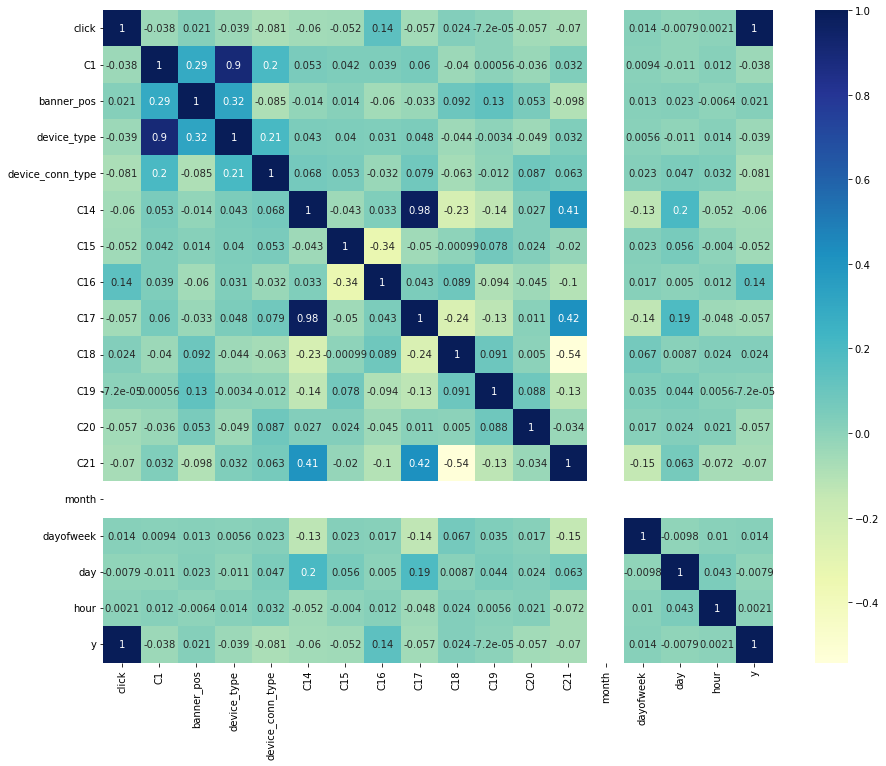

In [29]:
#  matplotlib and  seaborn already imported in the workbook
f ,ax = plt.subplots(figsize=(15,12)) 
sns.heatmap(df_data.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Heatmap allows us to see the correlations between attributes
1. Y and Click looks like same columns, possible we can drop on of them
2. Month doesn't have correlation with any variable. It has only 1 data entry, no exrtra information
3. C14 possible to remove as highly correlation with C17 and some correlation with C21 
4. C21 still showing +ve correlation with C17 and -ve correlation with C18. hence possible to remove
5. C15 , C16 having 93% of data points centered around same values (320 & 50) hence to be removed.
6. Also possibe to remove C20 as approx. 47% values centered around -1. As a categorical variable it's not expected to have values as -1.
7. High positive correlation between C1 , device_type,banner_pos variables seems to make logical sense as well. C1 to be removed.
8. If two features could mean nearly the same, it is not worth including in the feature set as it will reduce the accuracy of the model. Our dataset has features like the device_id, device_ip etc., which will not help us in predicting if an advertisement was clicked or not. Number of labels also extremely high

In [30]:
# as said above dropping columns. 
df_data.drop(['y','month','C1','C14','C15','C16','C20','C21','device_ip','device_id'], axis=1, inplace=True)
df_data.columns

Index(['click', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_model', 'device_type',
       'device_conn_type', 'C17', 'C18', 'C19', 'dayofweek', 'day', 'hour'],
      dtype='object')

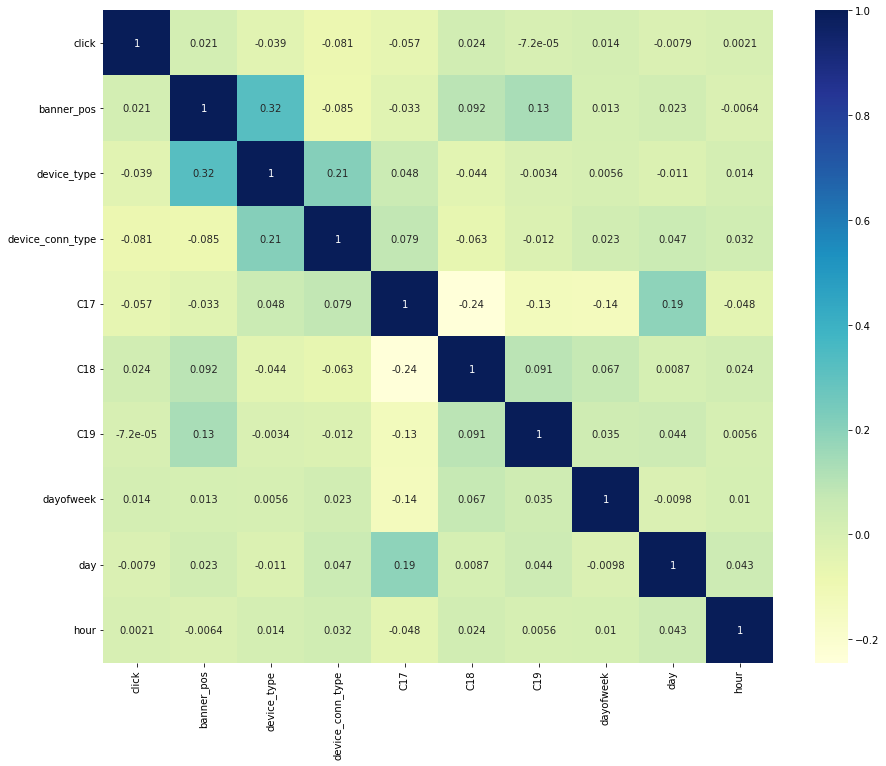

In [31]:
#  matplotlib and  seaborn already imported in the workbook
f ,ax = plt.subplots(figsize=(15,12)) 
sns.heatmap(df_data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [32]:
numerical = []
categorical = []

for col in (df_data.columns):
    if df_data[col].dtype == "object":
        categorical.append(col)
    else:
        numerical.append(col)
print("numerical columns = ",numerical)
print("\ncategorical columns = ",categorical)

df_data_num=df_data[numerical]
df_data_catg=df_data[categorical]


numerical columns =  ['click', 'banner_pos', 'device_type', 'device_conn_type', 'C17', 'C18', 'C19', 'dayofweek', 'day', 'hour']

categorical columns =  ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_model']


## Features 
#### We can group all the features in the data into the following categories:
#### Target feature : click
#### site features : site_id, site_domain, site_category
#### app feature: app_id, app_domain, app_category
#### device feature: device_id, device_ip, device_model, device_type, device_conn_type
#### anonymized categorical features: C14-C21


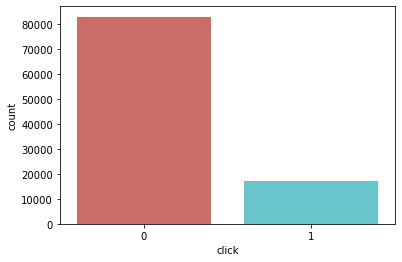

In [33]:
sns.countplot(x='click',data=df_data, palette='hls')
plt.show();

##  " Dataset is imbalanced "

In [34]:
df_data['click'].value_counts()/len(df_data)

0    0.830198
1    0.169802
Name: click, dtype: float64

The overall click through rate is approx. 17%, and approx. 83% is not clicked.



In [35]:
df_data['site_category'].value_counts()

50e219e0    40839
f028772b    31408
28905ebd    18107
3e814130     7668
f66779e6      634
75fa27f6      392
335d28a8      358
76b2941d      247
c0dd3be3      104
72722551       64
dedf689d       58
70fb0e29       45
0569f928       34
8fd0aea4       19
a818d37a       12
42a36e14        4
e787de0e        4
9ccfa2ea        1
5378d028        1
Name: site_category, dtype: int64

In [36]:
df_data['device_model'].value_counts()

8a4875bd    6041
1f0bc64f    3401
d787e91b    3373
76dc4769    1862
be6db1d7    1805
            ... 
1dbc394f       1
913bd042       1
1d222263       1
8932b0c5       1
c84e186e       1
Name: device_model, Length: 3145, dtype: int64

In [37]:
df_data.hour.describe()

count    99999.000000
mean        11.300673
std          5.938725
min          0.000000
25%          7.000000
50%         11.000000
75%         16.000000
max         23.000000
Name: hour, dtype: float64

### Hour

In [38]:
df_data['hour'].head()

0    14
1    19
2    18
3    19
4     8
Name: hour, dtype: int64

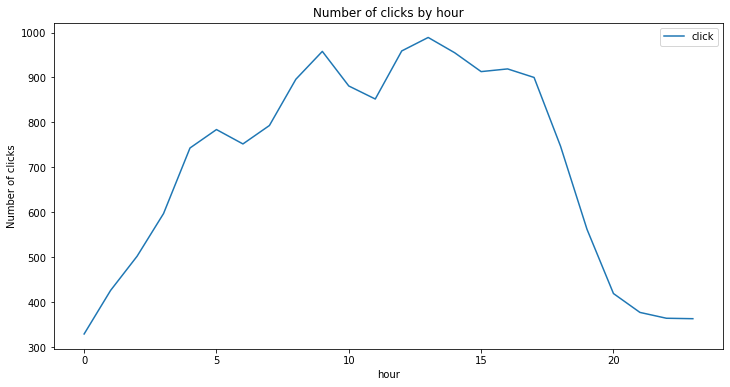

In [39]:
df_data.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

In general, the highest number of clicks is at hour 13 and 14 (1pm and 2pm), and the lowest number of clicks is at hour 0 (mid-night). It seems a useful feature for roughly estimation.

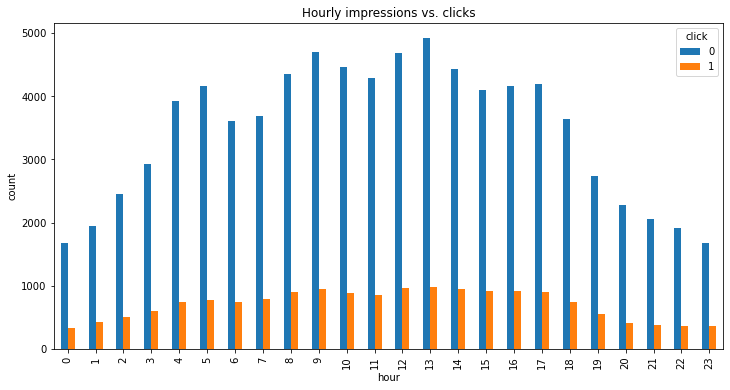

In [40]:
df_data.groupby(['hour', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');

### Hourly CTR

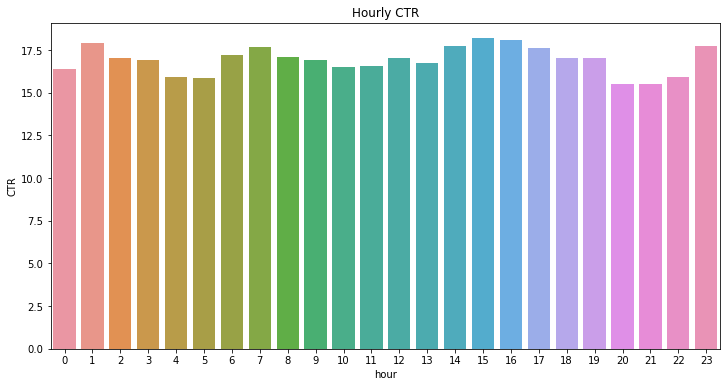

In [41]:
df_click = df_data[df_data['click'] == 1]
df_hour = df_data[['hour','click']].groupby(['hour']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hour','click']].groupby(['hour']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour', data=df_hour)
plt.title('Hourly CTR');

One of the interesting observations here is that the highest CTR happened in the hour of  1, 7 and 15. If you remember, around mid-night has the least number of impressions and clicks.

### Day of week



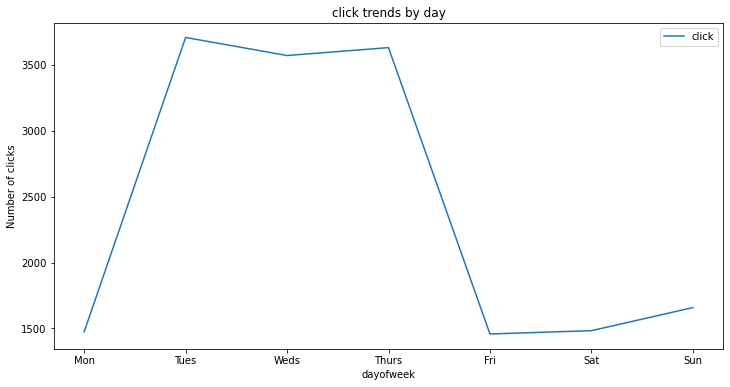

In [42]:
df_data.groupby('dayofweek').agg({'click':'sum'}).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.ylabel('Number of clicks')
plt.title('click trends by day');

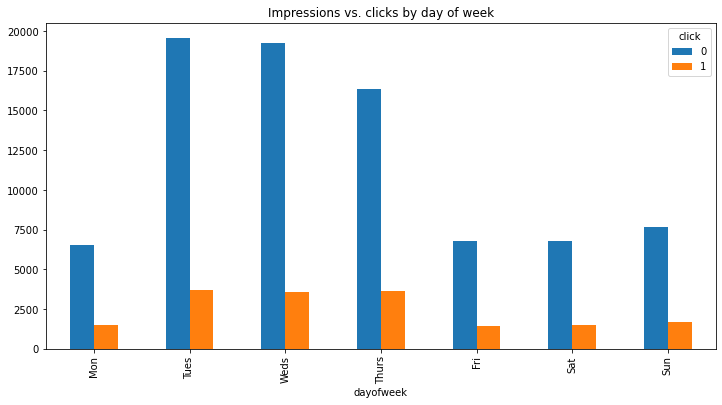

In [43]:
df_data.groupby(['dayofweek','click']).size().unstack().plot(kind='bar', title="Day of the Week", figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Impressions vs. clicks by day of week');

Tuesdays have the most number of impressions and clicks, then Wednesdays, followed by Thursdays. Mondays and Fridays have the least number of impressions and clicks.

### Day of week CTR



In [44]:
df_click = df_data[df_data['click'] == 1]
df_dayofweek = df_data[['dayofweek','click']].groupby(['dayofweek']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'click': 'impressions'})
df_dayofweek['clicks'] = df_click[['dayofweek','click']].groupby(['dayofweek']).count().reset_index()['click']
df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions']*100


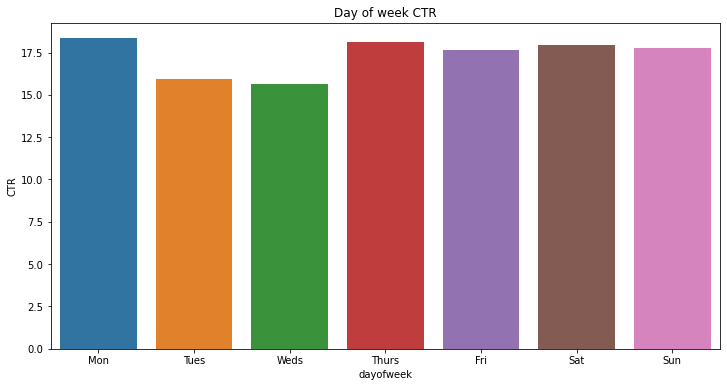

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='dayofweek', data=df_dayofweek)
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Day of week CTR');

While Tuesdays and Wednesdays have the highest number of impressions and clicks, their CTR are among the lowest. Saturdays and Sundays enjoy the high CTR. Apparently, people have more time to click over the weekend.

### Banner position

Multiple factors could affect the performance of your banner ads, but the most influential one is the banner position. Let’s see whether it is true.

In [46]:
print(df_data.banner_pos.value_counts()/len(df_data))

0    0.717787
1    0.280523
7    0.001070
2    0.000300
4    0.000190
5    0.000090
3    0.000040
Name: banner_pos, dtype: float64


In [47]:
banner_pos = df_data.banner_pos.unique()
banner_pos.sort()
ctr_avg_list=[]
for i in banner_pos:
    ctr_avg=df_data.loc[np.where((df_data.banner_pos == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for banner position: {},  click through rate: {}".format(i,ctr_avg))

for banner position: 0,  click through rate: 0.16530134581626682
for banner position: 1,  click through rate: 0.1808783687437616
for banner position: 2,  click through rate: 0.16666666666666666
for banner position: 3,  click through rate: 0.25
for banner position: 4,  click through rate: 0.05263157894736842
for banner position: 5,  click through rate: 0.0
for banner position: 7,  click through rate: 0.3177570093457944


The important banner positions are:

position 0: 72% of the data and 0.16 CTR

position 1: 28% of the data and 0.18 CTR

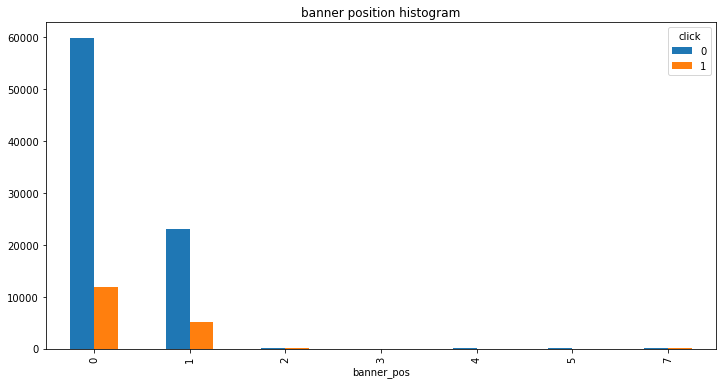

In [48]:
df_data.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='banner position histogram');

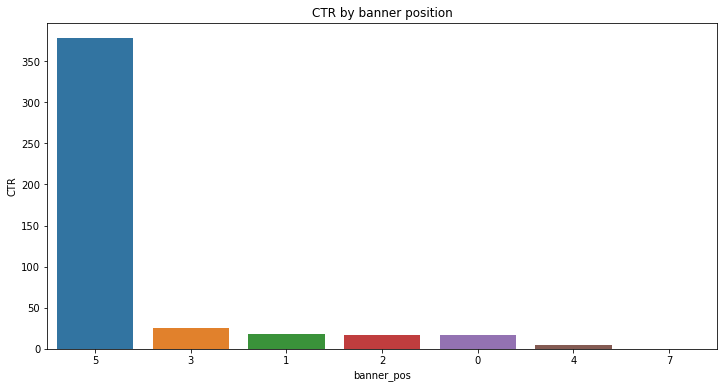

In [49]:
df_banner = df_data[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns={'click': 'impressions'})
df_banner['clicks'] = df_click[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='banner_pos', data=df_banner, order=sort_banners)
plt.title('CTR by banner position');

Although banner position 0 has the highest number of impressions and clicks, banner position 5 enjoys the highest CTR. Increasing the number of ads placed on banner position 5 seems to be a good idea.

### Device type

In [50]:
df_data.loc[:,'device_type'].value_counts() 

1    92239
0     5494
4     1931
5      335
Name: device_type, dtype: int64

We can see that there are four types of devices, with type 1 being the most prevalent.

In [51]:
print('The impressions by device types')
print((df_data.device_type.value_counts()/len(df_data)))

The impressions by device types
1    0.922399
0    0.054941
4    0.019310
5    0.003350
Name: device_type, dtype: float64


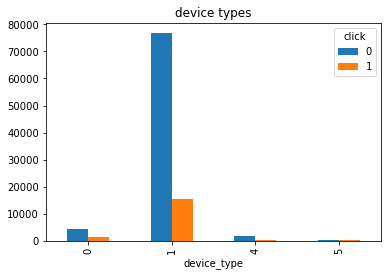

In [52]:
df_data[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar', title='device types');

Device type 1 gets the most impressions and clicks, and the other device types only get the minimum impressions and clicks. We may want to look in more details about device type 1.

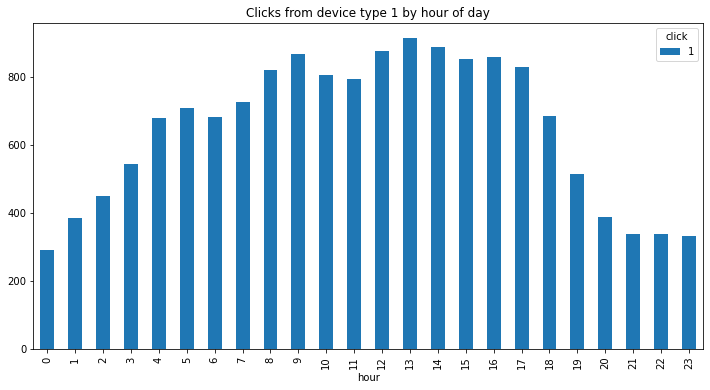

In [53]:
df_click[df_click['device_type']==1].groupby(['hour', 'click']).size().unstack().plot(kind='bar', title="Clicks from device type 1 by hour of day", figsize=(12,6));

As expected, most clicks happened during the business hours from device type 1.

In [54]:
device_type_click = df_click.groupby('device_type').agg({'click':'sum'}).reset_index()
device_type_impression = df_data.groupby('device_type').agg({'click':'count'}).reset_index().rename(columns={'click': 'impressions'})
merged_device_type = pd.merge(left = device_type_click , right = device_type_impression, how = 'inner', on = 'device_type')
merged_device_type['CTR'] = merged_device_type['click'] / merged_device_type['impressions']*100
merged_device_type

,device_type,click,impressions,CTR
0,0,1206,5494,21.951220
1,1,15551,92239,16.859463
2,4,184,1931,9.528742
3,5,39,335,11.641791


The highest CTR comes from device type 0.

# Step 3.  Data Transformation 

In [55]:
df_data.dtypes

click                int64
banner_pos           int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_model        object
device_type          int64
device_conn_type     int64
C17                  int64
C18                  int64
C19                  int64
dayofweek            int64
day                  int64
hour                 int64
dtype: object

## Encoding

### As mentioned earlier all categorical variables have lot of unique values in it, one hot encoding is not a scalable approach for considering each as it increases high dimenionality . We will create dummies for features of interest.

### we will go with Target encoding and scaling approach is a better idea for this.

In [56]:
df_s.columns_stats.T

,counts,uniques,missing,missing_perc,types
click,99999,2,0,0%,bool
C1,99999,7,0,0%,numeric
banner_pos,99999,7,0,0%,numeric
site_id,99999,1485,0,0%,categorical
site_domain,99999,1331,0,0%,categorical
site_category,99999,19,0,0%,categorical
app_id,99999,1354,0,0%,categorical
app_domain,99999,96,0,0%,categorical
app_category,99999,21,0,0%,categorical
device_id,99999,16801,0,0%,categorical


In [57]:
# used for data manipulation. It converts categorical data into dummy or indicator variables
df = pd.get_dummies(df_data, columns=['banner_pos','device_type', 'device_conn_type'],drop_first=True)

In [58]:
df.columns

Index(['click', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_model', 'C17', 'C18', 'C19',
       'dayofweek', 'day', 'hour', 'banner_pos_1', 'banner_pos_2',
       'banner_pos_3', 'banner_pos_4', 'banner_pos_5', 'banner_pos_7',
       'device_type_1', 'device_type_4', 'device_type_5', 'device_conn_type_2',
       'device_conn_type_3', 'device_conn_type_5'],
      dtype='object')

In [59]:
df.shape

(99999, 26)

In [60]:
X = df.drop(['click'], axis=1) # All independent variables / Features
y = df['click']             # Targert variable

In [61]:
y

0        0
1        1
2        0
3        0
4        1
        ..
99994    0
99995    0
99996    1
99997    1
99998    0
Name: click, Length: 99999, dtype: int64

In [62]:
X.columns

Index(['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_model', 'C17', 'C18', 'C19', 'dayofweek', 'day',
       'hour', 'banner_pos_1', 'banner_pos_2', 'banner_pos_3', 'banner_pos_4',
       'banner_pos_5', 'banner_pos_7', 'device_type_1', 'device_type_4',
       'device_type_5', 'device_conn_type_2', 'device_conn_type_3',
       'device_conn_type_5'],
      dtype='object')

In [63]:
X.dtypes

site_id               object
site_domain           object
site_category         object
app_id                object
app_domain            object
app_category          object
device_model          object
C17                    int64
C18                    int64
C19                    int64
dayofweek              int64
day                    int64
hour                   int64
banner_pos_1           uint8
banner_pos_2           uint8
banner_pos_3           uint8
banner_pos_4           uint8
banner_pos_5           uint8
banner_pos_7           uint8
device_type_1          uint8
device_type_4          uint8
device_type_5          uint8
device_conn_type_2     uint8
device_conn_type_3     uint8
device_conn_type_5     uint8
dtype: object

In [64]:
#pip install category_encoders

In [65]:
from category_encoders import TargetEncoder

target_encoder = TargetEncoder()
X = target_encoder.fit_transform(X, y)
X.head()

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,C17,C18,C19,dayofweek,day,hour,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,banner_pos_5,banner_pos_7,device_type_1,device_type_4,device_type_5,device_conn_type_2,device_conn_type_3,device_conn_type_5
0,0.034043,0.034043,0.176707,0.197227,0.194074,0.198258,0.189474,2528,0,39,1,28,14,1,0,0,0,0,0,1,0,0,0,0,0
1,0.296498,0.258816,0.176707,0.197227,0.194074,0.198258,0.276074,1934,2,39,2,22,19,1,0,0,0,0,0,1,0,0,0,0,0
2,0.052133,0.034853,0.205942,0.197227,0.194074,0.198258,0.097858,2552,3,167,3,23,18,0,0,0,0,0,0,1,0,0,0,0,0
3,0.136212,0.138826,0.131223,0.197227,0.194074,0.198258,0.189147,2478,3,167,2,22,19,0,0,0,0,0,0,0,0,0,0,0,0
4,0.202875,0.202875,0.205942,0.197227,0.194074,0.198258,0.224832,1722,0,35,1,21,8,0,0,0,0,0,0,1,0,0,0,0,0


### DATA SPLIT 

In [66]:
# split X and y into training and testing sets 70:30 ratio 

from sklearn.model_selection import train_test_split

X_Train, X_Test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.3, random_state= 42)
print(X_Train.shape)
print(y_train.shape)
print(X_Test.shape)
print(y_test.shape)

(69999, 25)
(69999,)
(30000, 25)
(30000,)


In [67]:
## SCALING

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_Train)
X_test = scaler.transform(X_Test)

# Step 4. MODEL BUILDING 

In [69]:
# This function helps Train and Test data for evaluation the given model and provide accuracy and confusion matrix. 

def model_eval(model, X_train, y_train, X_test, y_test):
    #accuracy
    y_pred_train = model.predict(X_train)
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    
    y_pred_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    
    # confusion matrix
    cnf_matrix_train = metrics.confusion_matrix(y_train, y_pred_train)
    cnf_matrix_test = metrics.confusion_matrix(y_test, y_pred_test)

    return accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test

In [70]:
from sklearn.metrics import RocCurveDisplay

def draw_roc(model, X_train, y_train, X_test, y_test):
    roc_train = RocCurveDisplay.from_estimator(model, X_train, y_train, name='Train Data')
    roc_test = RocCurveDisplay.from_estimator(model, X_test, y_test, name='Test Data')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    return 

In [71]:
# Returns the ctossvalidation score for given number of n folds. 
from sklearn.model_selection import cross_val_score

def cross_val (model, x, y, folds):
    crossvalidation = cross_val_score(model, x, y, cv= folds, n_jobs=-1)
    return crossvalidation

In [72]:
# this stores the results in dataframe for evaluating the final result. X_train, y_train


def store_results(name, y_train, X_train, y_test, X_test, model, folds):
    
    crossvalidation = cross_val(model, X_train, y_train, folds)
    
    # Train Matrices ...........................................................................................
    accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test =  model_eval(model, X_train, y_train, X_test, y_test)
    TP_Train = cnf_matrix_train[1,1] # true positive 
    TN_Train = cnf_matrix_train[0,0] # true negatives
    FP_Train = cnf_matrix_train[0,1] # false positives
    FN_Train = cnf_matrix_train[1,0] # false negatives
    Accuracy_Train = round((TP_Train + TN_Train)/ (TP_Train + TN_Train + FP_Train + FN_Train),2) 
    Recall_Train = round(TP_Train / (TP_Train + FN_Train),2)
    Precision_Train = round(TP_Train / (TP_Train + FP_Train),2)
    F1_score_Train = round(2 * ((Recall_Train * Precision_Train) / (Recall_Train + Precision_Train)),2)
    
    # Test Matrices ...........................................................................................
    TP_Test = cnf_matrix_test[1,1] # true positive 
    TN_Test = cnf_matrix_test[0,0] # true negatives
    FP_Test = cnf_matrix_test[0,1] # false positives
    FN_Test = cnf_matrix_test[1,0] # false negatives
    
    Accuracy_Test = round((TP_Test + TN_Test)/ (TP_Test + TN_Test + FP_Test + FN_Test),2)
    Recall_Test = round(TP_Test / (TP_Test + FN_Test),2)
    Precision_Test = round(TP_Test / (TP_Test + FP_Test),2)
    F1_score_Test = round(2 * ((Recall_Test * Precision_Test) / (Recall_Test + Precision_Test)),2)
    
    entry = {'Model': [name],
          'Accuracy_train': [Accuracy_Train],
          'recall_train': [Recall_Train],
          'precision_train': [Precision_Train],
          'F1_score_train' : [F1_score_Train],
             
          'Accuracy_test': [Accuracy_Test],
          'recall_test': [Recall_Test],
          'precision_test': [Precision_Test],
          'F1_score_test' : [F1_score_Test],  
             
          'CrossVal_Mean': [crossvalidation.mean()],           
          'CrossVal1': [crossvalidation[0]],
          'CrossVal2': [crossvalidation[1]],
          'CrossVal3': [crossvalidation[2]],
          'CrossVal4': [crossvalidation[3]],
          'CrossVal5': [crossvalidation[4]],
          }
    result = pd.DataFrame(entry)
    return result


## Dummy classifier for verification
#### Dummy classifier helps in baseling the model performace w.r.t dominanat class

In [73]:
# Calculating a base line for comparing the model. 
from sklearn.dummy import DummyClassifier

In [74]:
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)

### For verifying answer:
print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.8302


[[24906     0]
 [ 5094     0]]


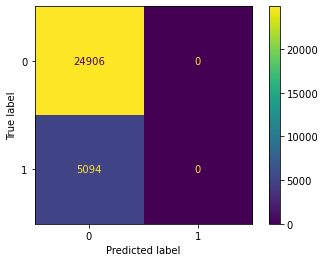

In [75]:
y_pred_base=dummy_classifier.predict(X_test)

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_base)
print(cnf_matrix)
metrics.plot_confusion_matrix(dummy_classifier, X_test, y_test)
plt.show()

ROC curve for Dummy classifier.............................................................................


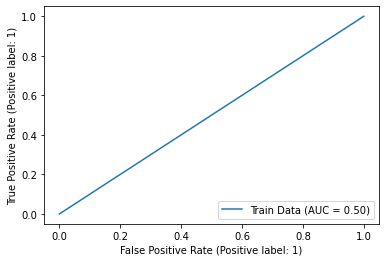

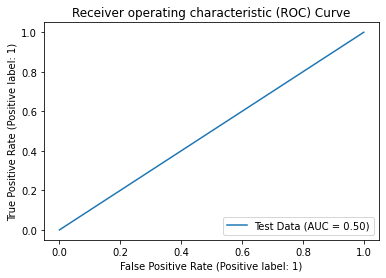

Train Accuracy...................

 0.8301975742510608

Train Confusion Matrix...........

 [[58113     0]
 [11886     0]]

Test Accuracy.....................

 0.8302

Test Confusion Matrix..............

 [[24906     0]
 [ 5094     0]]


,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.0,NaN,NaN,0.83,0.0,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202


In [76]:
print('ROC curve for Dummy classifier.............................................................................')
draw_roc(dummy_classifier, X_train, y_train, X_test, y_test)

# Train data And Test Data.......................................................................................
accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test= model_eval(dummy_classifier, X_train, y_train, X_test, y_test)
print("Train Accuracy...................\n\n", accuracy_train)
print('') 
print("Train Confusion Matrix...........\n\n",cnf_matrix_train)
print('')
print("Test Accuracy.....................\n\n",accuracy_test)
print('')
print("Test Confusion Matrix..............\n\n",cnf_matrix_test)


# Store the result ..............................................................................................
outcome = pd.DataFrame()

temp = store_results("Dummy_Classifier", y_train, X_train, y_test, X_test, dummy_classifier, 5)
outcome = outcome.append(temp)
outcome

## Logistic Regression

In [77]:
# Fit your training data to a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# diclare the logistic model
model_LR = LogisticRegression()

# train the model on the data
model_LR.fit(X_train, y_train)

LogisticRegression()

In [78]:
model_LR.coef_

array([[ 0.40921306,  0.18860019, -0.03535588,  0.74219869, -0.17896891,
        -0.22861246,  0.37847549, -0.06947825, -0.05057655,  0.03971239,
         0.01395355, -0.01368974, -0.0261939 ,  0.03168475, -0.01101113,
         0.01161717, -0.09398567, -0.06429345,  0.01567742,  0.02096933,
         0.04087846,  0.00515356,  0.03005734,  0.03836999, -0.01928705]])

In [79]:
model_LR.coef_.shape

(1, 25)

In [80]:
# Use the testing data to make predictions and determine the accuracy of your predictions.
y_pred_LR = model_LR.predict(X_test)

Logistic Regression accuracy score 
 0.832

Logistic Confusion Matrix 
  [[24417   489]
 [ 4551   543]]


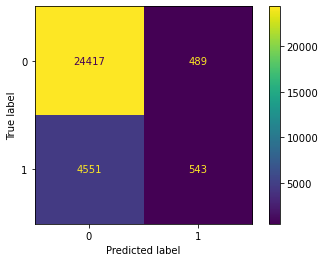

In [81]:
from sklearn import metrics
print("Logistic Regression accuracy score \n", metrics.accuracy_score(y_test, y_pred_LR))

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_LR)
print( "\nLogistic Confusion Matrix \n ",cnf_matrix)
metrics.plot_confusion_matrix(model_LR, X_test, y_test)
plt.show()

In [82]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])

0.7517867456469463

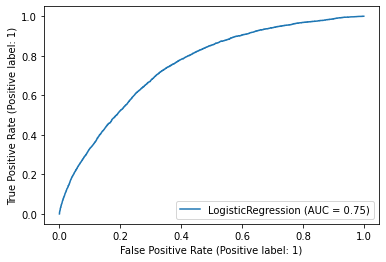

In [83]:
import matplotlib.pyplot as plt
metrics.plot_roc_curve(model_LR, X_test, y_test) 
plt.show()

In [84]:
LogReg_acc = model_LR.score(X_test,y_test)

In [85]:
LogReg_acc

0.832

In [86]:
accuracy_value_LR = metrics.accuracy_score(y_test,y_pred_LR)
accuracy_value_LR

0.832

ROC curve for  Logistic Regression classifier............................................................


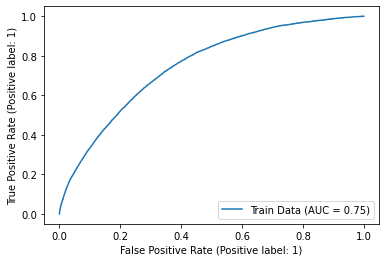

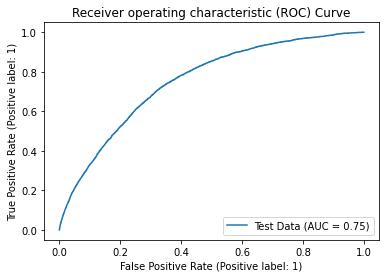

Train Accuracy...................

 0.8333547622108888

Train Confusion Matrix...........

 [[57086  1027]
 [10638  1248]]

Test Accuracy.....................

 0.832

Test Confusion Matrix..............

 [[24417   489]
 [ 4551   543]]


,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.0,NaN,NaN,0.83,0.00,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
0,Logistic Regression,0.83,0.1,0.55,0.17,0.83,0.11,0.53,0.18,0.833469,0.832214,0.834500,0.833714,0.833214,0.833702


In [87]:
print('ROC curve for  Logistic Regression classifier............................................................')
draw_roc(model_LR, X_train, y_train, X_test, y_test)

# Train data And Test Data.......................................................................................
accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test= model_eval(model_LR, X_train, y_train, X_test, y_test)
print("Train Accuracy...................\n\n", accuracy_train)
print('') 
print("Train Confusion Matrix...........\n\n",cnf_matrix_train)
print('')
print("Test Accuracy.....................\n\n",accuracy_test)
print('')
print("Test Confusion Matrix..............\n\n",cnf_matrix_test)


# Store the result ..............................................................................................

temp = store_results("Logistic Regression", y_train, X_train, y_test, X_test, model_LR, 5)
outcome = outcome.append(temp)
outcome

Observation :
Logistic regression is behaving almost same as dummy classifier  as we check the accuracy . ROC_AUC is 0.75 for Logistic Regression

### Decision Trees 

In [88]:
# load sklearn libraries required to construct a Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [89]:
# Create a Decision Tree
model_dt = DecisionTreeClassifier()

In [90]:
# View the attributes of tree created
model_dt

DecisionTreeClassifier()

In [91]:
# Fit the training data
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [92]:
# Predict based on test data
y_preds_DT = model_dt.predict(X_test)

In [93]:
# View the predictions
y_preds_DT

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Accuracy

In [94]:
# Calculate Accuracy
accuracy_value_DT = metrics.accuracy_score(y_test,y_preds_DT)

In [95]:
# View the accuracy
accuracy_value_DT

0.7636666666666667

In [96]:
# Create and print confusion matrix
confusion_matrix(y_test,y_preds_DT)

array([[21462,  3444],
       [ 3646,  1448]], dtype=int64)

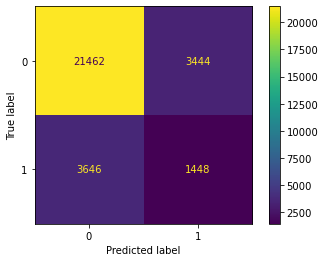

In [97]:
metrics.plot_confusion_matrix(model_dt, X_test, y_test)

In [98]:
# Print the confusion matrix
print(classification_report(y_test,y_preds_DT))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86     24906
           1       0.30      0.28      0.29      5094

    accuracy                           0.76     30000
   macro avg       0.58      0.57      0.57     30000
weighted avg       0.76      0.76      0.76     30000



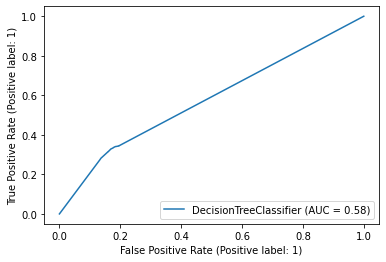

In [99]:
metrics.plot_roc_curve(model_dt, X_test, y_test) 
plt.show()

In [100]:
from sklearn.metrics import recall_score
recall_score(y_test, y_preds_DT)

0.28425598743619945

In [101]:
# Calculate the number of nodes in the tree
model_dt.tree_.node_count

31525

ROC curve for Decision Tree classifier..................................................................


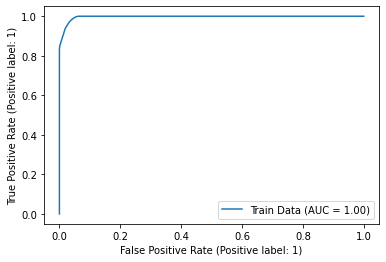

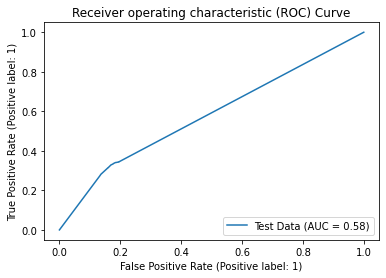

Train Accuracy...................

 0.9736281946884956

Train Confusion Matrix...........

 [[57999   114]
 [ 1732 10154]]

Test Accuracy.....................

 0.7636666666666667

Test Confusion Matrix..............

 [[21462  3444]
 [ 3646  1448]]


,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.00,NaN,NaN,0.83,0.00,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
0,Logistic Regression,0.83,0.10,0.55,0.17,0.83,0.11,0.53,0.18,0.833469,0.832214,0.834500,0.833714,0.833214,0.833702
0,Decision Tree,0.97,0.85,0.99,0.91,0.76,0.28,0.30,0.29,0.760111,0.764500,0.761500,0.757357,0.761357,0.755840


In [102]:
print('ROC curve for Decision Tree classifier..................................................................')
draw_roc(model_dt, X_train, y_train, X_test, y_test)

# Train data And Test Data.......................................................................................
accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test= model_eval(model_dt, X_train, y_train, X_test, y_test)
print("Train Accuracy...................\n\n", accuracy_train)
print('') 
print("Train Confusion Matrix...........\n\n",cnf_matrix_train)
print('')
print("Test Accuracy.....................\n\n",accuracy_test)
print('')
print("Test Confusion Matrix..............\n\n",cnf_matrix_test)


# Store the result ..............................................................................................

temp = store_results("Decision Tree", y_train, X_train, y_test, X_test, model_dt, 5)
outcome = outcome.append(temp)
outcome

observation : Decision tree on unbalanced data isn't doing that great as seems overfitting 


### Grid Search 

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
# parameters to build the model on
param_grid = {
    'max_depth': range(5, 20, 5),
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(50, 200, 50),
    'criterion': ["entropy", "gini"],
    'splitter' : ["best", "random"]
}

In [105]:
# instantiate the model
dt_grid = DecisionTreeClassifier(random_state = 42)

# fit tree on training data
gridsearch_DT = GridSearchCV(estimator = dt_grid, param_grid = param_grid, cv = 5, n_jobs=-1, verbose=True)

In [106]:
# fit tree on training data
gridsearch_DT.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 20, 5),
                         'min_samples_leaf': range(50, 200, 50),
                         'min_samples_split': range(50, 200, 50),
                         'splitter': ['best', 'random']},
             verbose=True)

In [107]:
cv_result = pd.DataFrame(gridsearch_DT.cv_results_)

In [108]:
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.589612,0.040663,0.010248,0.005743,entropy,5,50,50,best,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.836214,0.837214,0.836071,0.836143,0.834131,0.835955,0.001003,1
1,0.448327,0.019611,0.011052,0.006068,entropy,5,50,50,random,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.832071,0.834000,0.832429,0.831714,0.830416,0.832126,0.001157,98
2,0.620307,0.035137,0.022384,0.015889,entropy,5,50,100,best,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.836214,0.837214,0.836071,0.836143,0.834131,0.835955,0.001003,1
3,0.538176,0.060517,0.011076,0.006916,entropy,5,50,100,random,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.832071,0.834000,0.832429,0.831714,0.830416,0.832126,0.001157,98
4,0.659865,0.061785,0.002852,0.004436,entropy,5,50,150,best,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.836214,0.837214,0.836071,0.836000,0.834131,0.835926,0.000999,3


In [109]:
gridsearch_DT.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'splitter': 'best'}

In [110]:
gridsearch_DT.best_score_

0.8359547733001337

In [111]:
# Visualise the tree
best_grid = gridsearch_DT.best_estimator_

In [112]:
best_grid

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=50, random_state=42)

In [113]:
best_grid.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=50, random_state=42)

In [114]:
best_grid.score(X_test,y_test )

0.8365

In [115]:
# Importing required packages for visualization
from IPython.display import Image  
#from sklearn.externals.six import StringIO  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [116]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [117]:
#Select input columns as features
features = X_Train.columns
features

Index(['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_model', 'C17', 'C18', 'C19', 'dayofweek', 'day',
       'hour', 'banner_pos_1', 'banner_pos_2', 'banner_pos_3', 'banner_pos_4',
       'banner_pos_5', 'banner_pos_7', 'device_type_1', 'device_type_4',
       'device_type_5', 'device_conn_type_2', 'device_conn_type_3',
       'device_conn_type_5'],
      dtype='object')

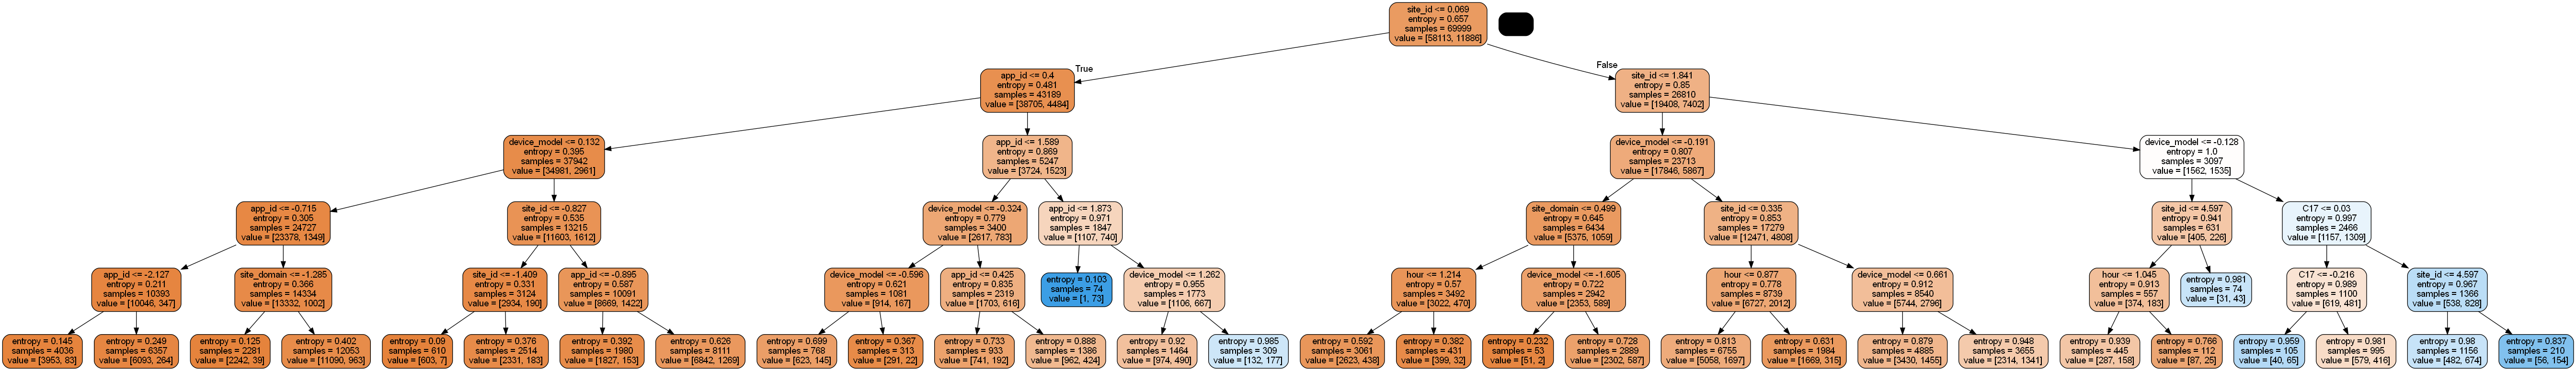

In [118]:
dot_data = StringIO()  
export_graphviz(best_grid, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [119]:
y_preds_GS = best_grid.predict(X_test)

In [120]:
accuracy_value_GS = metrics.accuracy_score(y_test,y_preds_GS)
accuracy_value_GS

0.8365

In [121]:
confusion_matrix(y_test,y_preds_GS)

array([[24579,   327],
       [ 4578,   516]], dtype=int64)

In [122]:
print(classification_report(y_test,y_preds_GS))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     24906
           1       0.61      0.10      0.17      5094

    accuracy                           0.84     30000
   macro avg       0.73      0.54      0.54     30000
weighted avg       0.80      0.84      0.78     30000



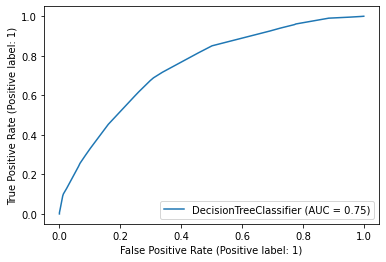

In [123]:
metrics.plot_roc_curve(best_grid, X_test, y_test) 
plt.show()

ROC curve for Decision Tree Grid Search Cross Validation ..................................................


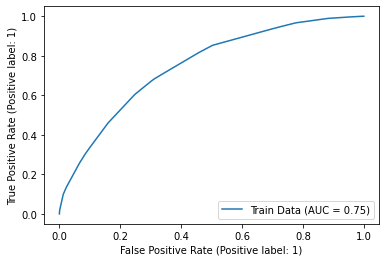

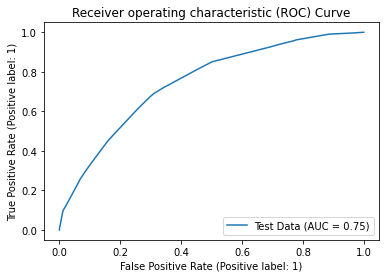

Train Accuracy...................

 0.8365405220074572

Train Confusion Matrix...........

 [[57371   742]
 [10700  1186]]

Test Accuracy.....................

 0.8365

Test Confusion Matrix..............

 [[24579   327]
 [ 4578   516]]


,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.00,NaN,NaN,0.83,0.00,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
0,Logistic Regression,0.83,0.10,0.55,0.17,0.83,0.11,0.53,0.18,0.833469,0.832214,0.834500,0.833714,0.833214,0.833702
0,Decision Tree,0.97,0.85,0.99,0.91,0.76,0.28,0.30,0.29,0.760111,0.764500,0.761500,0.757357,0.761357,0.755840
0,DecisionTree-GridSearchCV,0.84,0.10,0.62,0.17,0.84,0.10,0.61,0.17,0.835955,0.836214,0.837214,0.836071,0.836143,0.834131


In [124]:
print('ROC curve for Decision Tree Grid Search Cross Validation ..................................................')
draw_roc(best_grid, X_train, y_train, X_test, y_test)

# Train data And Test Data.......................................................................................
accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test= model_eval(best_grid, X_train, y_train, X_test, y_test)
print("Train Accuracy...................\n\n", accuracy_train)
print('') 
print("Train Confusion Matrix...........\n\n",cnf_matrix_train)
print('')
print("Test Accuracy.....................\n\n",accuracy_test)
print('')
print("Test Confusion Matrix..............\n\n",cnf_matrix_test)


# Store the result ..............................................................................................

temp = store_results("DecisionTree-GridSearchCV ", y_train, X_train, y_test, X_test, best_grid, 5)
outcome = outcome.append(temp)
outcome

Observation : With Grid search the Decision Tree seems to be doing better as it involves process of performing hyperparameter tuning in order to determine the optimal values for a given model. 

## Ensembles

### Bagging

In [125]:
def create_bootstrap_sample(df_new):
    return df.sample(n= df_new.shape[0], replace = True)

bootstrap_sample = create_bootstrap_sample(X_train)

print('Number of rows should be the same:')
print('Number of rows in X_train:  ', X_train.shape[0])
print('Number of rows in bootstrap:', create_bootstrap_sample(X_train).shape[0])

print(bootstrap_sample)

Number of rows should be the same:
Number of rows in X_train:   69999
Number of rows in bootstrap: 69999
       click   site_id site_domain site_category    app_id app_domain  \
93406      0  85f751fd    c4e18dd6      50e219e0  f53417e1   0e8616ad   
41083      0  85f751fd    c4e18dd6      50e219e0  92f5800b   ae637522   
19810      0  3281baa7    61eac15d      f028772b  ecad2386   7801e8d9   
78965      0  856e6d3f    58a89a43      f028772b  ecad2386   7801e8d9   
22013      0  5b08c53b    7687a86e      3e814130  ecad2386   7801e8d9   
...      ...       ...         ...           ...       ...        ...   
50263      0  1fbe01fe    f3845767      28905ebd  ecad2386   7801e8d9   
81815      0  5b08c53b    7687a86e      3e814130  ecad2386   7801e8d9   
22887      0  1fbe01fe    f3845767      28905ebd  ecad2386   7801e8d9   
44247      0  85f751fd    c4e18dd6      50e219e0  be7c618d   2347f47a   
47960      0  1fbe01fe    f3845767      28905ebd  ecad2386   7801e8d9   

      app_category

In [126]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_bagging = BaggingClassifier(random_state = 42)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print(' Accuracy = ', acc_bagging)

 Accuracy =  0.8038333333333333


In [127]:
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
print('Classification Report:\n')
print(classification_report(y_test, pred_bagging))

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     24906
           1       0.36      0.20      0.26      5094

    accuracy                           0.80     30000
   macro avg       0.60      0.56      0.57     30000
weighted avg       0.77      0.80      0.78     30000



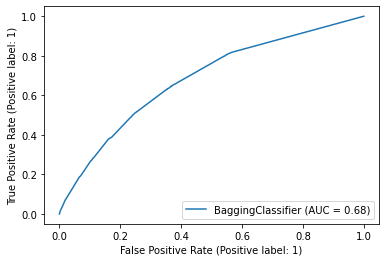

In [128]:
metrics.plot_roc_curve(model_bagging, X_test, y_test) 
plt.show()

In [129]:
def print_recall_scores(ensemble, feats, true_labels):
    '''
    Prints the recall scores for base estimators in a sklearn ensemble model.
    '''
    scores = []
    for model_idx, model in enumerate(ensemble.estimators_):
        if model_idx == 0:
            print('='*40)
        preds = model.predict(feats)
        scores.append(recall_score(true_labels, preds))
        model_recall = np.round(recall_score(true_labels, preds), 5)
        print(f'Recall for Base Model {model_idx+1}:\t', model_recall)
        if model_idx < (len(ensemble.estimators_) - 1):
            print('-'*40)
        else:
            print('='*40)
    ensemble_preds = ensemble.predict(feats)
    print("Mean Recall Score:\t\t", np.round(np.array(scores).mean(), 5))
    print("Std Deviation:\t\t\t", np.round(np.array(scores).std(), 5))
    print("Range:\t\t\t\t", np.round(np.array(scores).ptp(), 5))
    print(f'Overall Recall for model:\t {np.round(recall_score(y_test, ensemble_preds), 5)}')

In [130]:
print_recall_scores(model_bagging, X_test, y_test)

Recall for Base Model 1:	 0.29643
----------------------------------------
Recall for Base Model 2:	 0.29525
----------------------------------------
Recall for Base Model 3:	 0.3031
----------------------------------------
Recall for Base Model 4:	 0.29309
----------------------------------------
Recall for Base Model 5:	 0.30251
----------------------------------------
Recall for Base Model 6:	 0.29643
----------------------------------------
Recall for Base Model 7:	 0.28112
----------------------------------------
Recall for Base Model 8:	 0.28249
----------------------------------------
Recall for Base Model 9:	 0.30526
----------------------------------------
Recall for Base Model 10:	 0.29819
Mean Recall Score:		 0.29539
Std Deviation:			 0.0077
Range:				 0.02415
Overall Recall for model:	 0.19808


ROC curve for Ensemble Technique - Bagging  classifier..................................................................


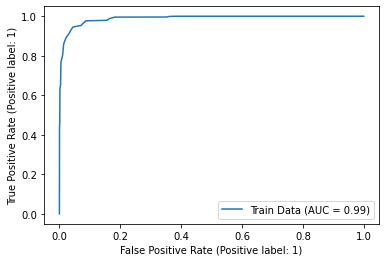

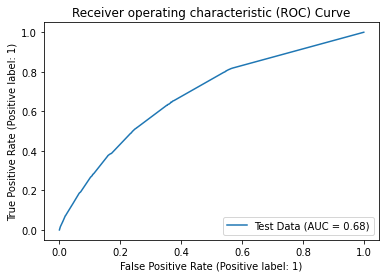

Train Accuracy...................

 0.95754225060358

Train Confusion Matrix...........

 [[57516   597]
 [ 2375  9511]]

Test Accuracy.....................

 0.8038333333333333

Test Confusion Matrix..............

 [[23106  1800]
 [ 4085  1009]]


,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.00,NaN,NaN,0.83,0.00,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
0,Logistic Regression,0.83,0.10,0.55,0.17,0.83,0.11,0.53,0.18,0.833469,0.832214,0.834500,0.833714,0.833214,0.833702
0,Decision Tree,0.97,0.85,0.99,0.91,0.76,0.28,0.30,0.29,0.760111,0.764500,0.761500,0.757357,0.761357,0.755840
0,DecisionTree-GridSearchCV,0.84,0.10,0.62,0.17,0.84,0.10,0.61,0.17,0.835955,0.836214,0.837214,0.836071,0.836143,0.834131
0,Bagging,0.96,0.80,0.94,0.86,0.80,0.20,0.36,0.26,0.804612,0.805000,0.805500,0.803357,0.803571,0.805629


In [131]:
print('ROC curve for Ensemble Technique - Bagging  classifier..................................................................')
draw_roc(model_bagging, X_train, y_train, X_test, y_test)

# Train data And Test Data.......................................................................................
accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test= model_eval(model_bagging, X_train, y_train, X_test, y_test)
print("Train Accuracy...................\n\n", accuracy_train)
print('') 
print("Train Confusion Matrix...........\n\n",cnf_matrix_train)
print('')
print("Test Accuracy.....................\n\n",accuracy_test)
print('')
print("Test Confusion Matrix..............\n\n",cnf_matrix_test)


# Store the result ..............................................................................................

temp = store_results("Bagging", y_train, X_train, y_test, X_test, model_bagging, 5)
outcome = outcome.append(temp)
outcome

### Random Forests

In [132]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=10, max_features=7, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
recall_rf = recall_score(y_test, predict_rf)
precision_rf = precision_score(y_test, predict_rf)

In [133]:
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
print('Classification Report:\n')
print(classification_report(y_test, predict_rf))

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     24906
           1       0.38      0.20      0.26      5094

    accuracy                           0.81     30000
   macro avg       0.61      0.56      0.57     30000
weighted avg       0.77      0.81      0.78     30000



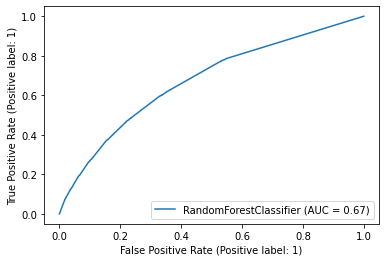

In [134]:
metrics.plot_roc_curve(model_rf, X_test, y_test) 
plt.show()

In [135]:
def print_recall_scores(ensemble, feats, true_labels):
    '''
    Prints the recall scores for base estimators in a sklearn ensemble model.
    '''
    scores = []
    for model_idx, model in enumerate(ensemble.estimators_):
        if model_idx == 0:
            print('='*40)
        preds = model.predict(feats)
        scores.append(recall_score(true_labels, preds))
        model_recall = np.round(recall_score(true_labels, preds), 5)
        print(f'Recall for Base Model {model_idx+1}:\t', model_recall)
        if model_idx < (len(ensemble.estimators_) - 1):
            print('-'*40)
        else:
            print('='*40)
    ensemble_preds = ensemble.predict(feats)
    print("Mean Recall Score:\t\t", np.round(np.array(scores).mean(), 5))
    print("Std Deviation:\t\t\t", np.round(np.array(scores).std(), 5))
    print("Range:\t\t\t\t", np.round(np.array(scores).ptp(), 5))
    print(f'Overall Recall for model:\t {np.round(recall_score(y_test, ensemble_preds), 5)}')

In [136]:
print_recall_scores(model_rf, X_test, y_test)

Recall for Base Model 1:	 0.29309
----------------------------------------
Recall for Base Model 2:	 0.27719
----------------------------------------
Recall for Base Model 3:	 0.28779
----------------------------------------
Recall for Base Model 4:	 0.28622
----------------------------------------
Recall for Base Model 5:	 0.28308
----------------------------------------
Recall for Base Model 6:	 0.28936
----------------------------------------
Recall for Base Model 7:	 0.27562
----------------------------------------
Recall for Base Model 8:	 0.27817
----------------------------------------
Recall for Base Model 9:	 0.28504
----------------------------------------
Recall for Base Model 10:	 0.28916
Mean Recall Score:		 0.28447
Std Deviation:			 0.00555
Range:				 0.01747
Overall Recall for model:	 0.19651


In [137]:
from sklearn.ensemble import RandomForestClassifier

model_rf_oob = RandomForestClassifier(n_estimators=100, max_features=7, oob_score=True, random_state=42).fit(X_train, y_train)
oob_score = round(model_rf_oob.oob_score_,4)
acc_oob = round(accuracy_score(y_test, model_rf_oob.predict(X_test)),4)
diff_oob = round(abs(oob_score - acc_oob),4)

print('OOB Score:\t\t\t', oob_score)
print('Testing Accuracy:\t\t', acc_oob)
print('Acc. Difference:\t\t', diff_oob)


OOB Score:			 0.8063
Testing Accuracy:		 0.8104
Acc. Difference:		 0.0041


In [138]:
print(model_rf.score(X_train, y_train)) 
print(model_rf.score(X_test, y_test))

0.956613665909513
0.8080333333333334


ROC curve for Random Forest classifier..................................................................


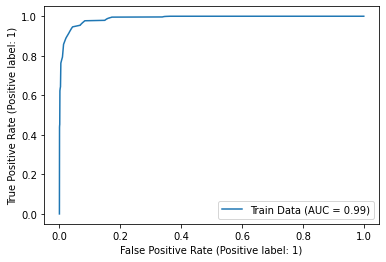

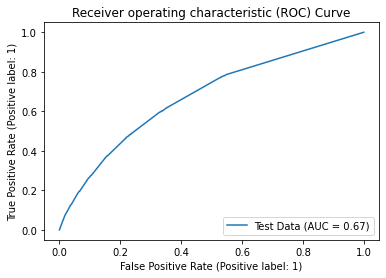

Train Accuracy...................

 0.956613665909513

Train Confusion Matrix...........

 [[57532   581]
 [ 2456  9430]]

Test Accuracy.....................

 0.8080333333333334

Test Confusion Matrix..............

 [[23240  1666]
 [ 4093  1001]]


,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.00,NaN,NaN,0.83,0.00,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
0,Logistic Regression,0.83,0.10,0.55,0.17,0.83,0.11,0.53,0.18,0.833469,0.832214,0.834500,0.833714,0.833214,0.833702
0,Decision Tree,0.97,0.85,0.99,0.91,0.76,0.28,0.30,0.29,0.760111,0.764500,0.761500,0.757357,0.761357,0.755840
0,DecisionTree-GridSearchCV,0.84,0.10,0.62,0.17,0.84,0.10,0.61,0.17,0.835955,0.836214,0.837214,0.836071,0.836143,0.834131
0,Bagging,0.96,0.80,0.94,0.86,0.80,0.20,0.36,0.26,0.804612,0.805000,0.805500,0.803357,0.803571,0.805629
0,Random Forest,0.96,0.79,0.94,0.86,0.81,0.20,0.38,0.26,0.806354,0.804857,0.807357,0.805214,0.807286,0.807058


In [139]:
print('ROC curve for Random Forest classifier..................................................................')
draw_roc(model_rf, X_train, y_train, X_test, y_test)

# Train data And Test Data.......................................................................................
accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test= model_eval(model_rf, X_train, y_train, X_test, y_test)
print("Train Accuracy...................\n\n", accuracy_train)
print('') 
print("Train Confusion Matrix...........\n\n",cnf_matrix_train)
print('')
print("Test Accuracy.....................\n\n",accuracy_test)
print('')
print("Test Confusion Matrix..............\n\n",cnf_matrix_test)


# Store the result ..............................................................................................

temp = store_results("Random Forest", y_train, X_train, y_test, X_test, model_rf, 5)
outcome = outcome.append(temp)
outcome

### Boosting

#### Adaboost

In [140]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_est = DecisionTreeClassifier (max_depth =5)
ada_boost1 = AdaBoostClassifier(base_est, n_estimators=100, random_state=42, learning_rate=1.0)
ada_boost1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100, random_state=42)

In [141]:
print(ada_boost1.score(X_train, y_train)) 
print(ada_boost1.score(X_test, y_test))

0.8564979499707138
0.8301333333333333


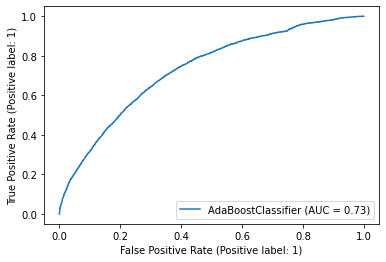

In [142]:
metrics.plot_roc_curve(ada_boost1, X_test, y_test) 
plt.show()

ROC curve for Adaptive Boosting Classifier..................................................


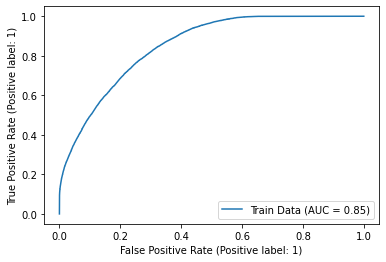

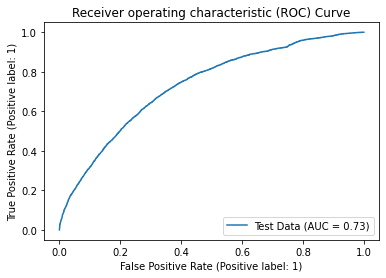

Train Accuracy...................

 0.8564979499707138

Train Confusion Matrix...........

 [[57073  1040]
 [ 9005  2881]]

Test Accuracy.....................

 0.8301333333333333

Test Confusion Matrix..............

 [[24068   838]
 [ 4258   836]]


,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.00,NaN,NaN,0.83,0.00,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
0,Logistic Regression,0.83,0.10,0.55,0.17,0.83,0.11,0.53,0.18,0.833469,0.832214,0.834500,0.833714,0.833214,0.833702
0,Decision Tree,0.97,0.85,0.99,0.91,0.76,0.28,0.30,0.29,0.760111,0.764500,0.761500,0.757357,0.761357,0.755840
0,DecisionTree-GridSearchCV,0.84,0.10,0.62,0.17,0.84,0.10,0.61,0.17,0.835955,0.836214,0.837214,0.836071,0.836143,0.834131
0,Bagging,0.96,0.80,0.94,0.86,0.80,0.20,0.36,0.26,0.804612,0.805000,0.805500,0.803357,0.803571,0.805629
0,Random Forest,0.96,0.79,0.94,0.86,0.81,0.20,0.38,0.26,0.806354,0.804857,0.807357,0.805214,0.807286,0.807058
0,Adaptive_Boosting,0.86,0.24,0.73,0.36,0.83,0.16,0.50,0.24,0.826326,0.827000,0.825643,0.824214,0.826500,0.828273


In [143]:
print('ROC curve for Adaptive Boosting Classifier..................................................')
draw_roc(ada_boost1, X_train, y_train, X_test, y_test)

# Train data And Test Data.......................................................................................
accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test= model_eval(ada_boost1, X_train, y_train, X_test, y_test)
print("Train Accuracy...................\n\n", accuracy_train)
print('') 
print("Train Confusion Matrix...........\n\n",cnf_matrix_train)
print('')
print("Test Accuracy.....................\n\n",accuracy_test)
print('')
print("Test Confusion Matrix..............\n\n",cnf_matrix_test)


# Store the result ..............................................................................................

temp = store_results("Adaptive_Boosting ", y_train, X_train, y_test, X_test, ada_boost1, 5)
outcome = outcome.append(temp)
outcome

#### Gradient Boosted Trees (GBT)

In [144]:
#Gradient Boosted Trees (GBT)
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
gbc.score(X_test, y_test)
recall_gbc = round(recall_score(y_test, gbc_pred),4)
precision_gbc = round(precision_score(y_test, gbc_pred),4)

print('Recall :\t {}'.format(recall_gbc))
print('Precision :\t {}:'.format(precision_gbc))

Recall :	 0.1009
Precision :	 0.6531:


In [145]:
print(gbc.score(X_train, y_train)) 
print(gbc.score(X_test, y_test))

0.8395691367019529
0.8382333333333334


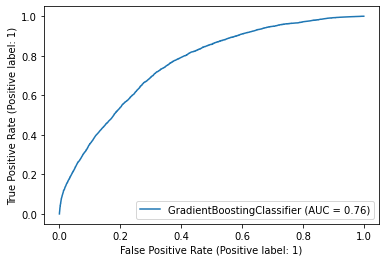

In [146]:
metrics.plot_roc_curve(gbc, X_test, y_test) 
plt.show()

ROC curve for Gradient Boosting Classifier..................................................


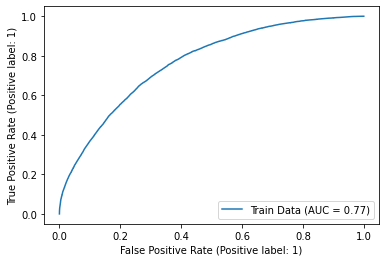

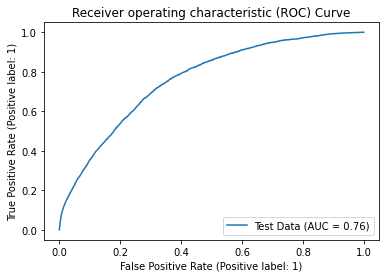

Train Accuracy...................

 0.8395691367019529

Train Confusion Matrix...........

 [[57544   569]
 [10661  1225]]

Test Accuracy.....................

 0.8382333333333334

Test Confusion Matrix..............

 [[24633   273]
 [ 4580   514]]


,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.00,NaN,NaN,0.83,0.00,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
0,Logistic Regression,0.83,0.10,0.55,0.17,0.83,0.11,0.53,0.18,0.833469,0.832214,0.834500,0.833714,0.833214,0.833702
0,Decision Tree,0.97,0.85,0.99,0.91,0.76,0.28,0.30,0.29,0.760111,0.764500,0.761500,0.757357,0.761357,0.755840
0,DecisionTree-GridSearchCV,0.84,0.10,0.62,0.17,0.84,0.10,0.61,0.17,0.835955,0.836214,0.837214,0.836071,0.836143,0.834131
0,Bagging,0.96,0.80,0.94,0.86,0.80,0.20,0.36,0.26,0.804612,0.805000,0.805500,0.803357,0.803571,0.805629
0,Random Forest,0.96,0.79,0.94,0.86,0.81,0.20,0.38,0.26,0.806354,0.804857,0.807357,0.805214,0.807286,0.807058
0,Adaptive_Boosting,0.86,0.24,0.73,0.36,0.83,0.16,0.50,0.24,0.826326,0.827000,0.825643,0.824214,0.826500,0.828273
0,Gradient_Boosting,0.84,0.10,0.68,0.17,0.84,0.10,0.65,0.17,0.837826,0.838571,0.838286,0.837571,0.838071,0.836631


In [147]:
print('ROC curve for Gradient Boosting Classifier..................................................')
draw_roc(gbc, X_train, y_train, X_test, y_test)

# Train data And Test Data.......................................................................................
accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test= model_eval(gbc, X_train, y_train, X_test, y_test)
print("Train Accuracy...................\n\n", accuracy_train)
print('') 
print("Train Confusion Matrix...........\n\n",cnf_matrix_train)
print('')
print("Test Accuracy.....................\n\n",accuracy_test)
print('')
print("Test Confusion Matrix..............\n\n",cnf_matrix_test)


# Store the result ..............................................................................................

temp = store_results("Gradient_Boosting ", y_train, X_train, y_test, X_test, gbc, 5)
outcome = outcome.append(temp)
outcome

### XGBoost

In [148]:
#pip install xgboost

In [149]:
import xgboost as xgb
from sklearn import metrics

In [150]:
xgclf = xgb.XGBClassifier()
xgclf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [151]:
xgclf_pred = xgclf.predict(X_test)


In [152]:
print(xgclf.score(X_train, y_train))
print(xgclf.score(X_test, y_test)) 

0.8511835883369763
0.8393666666666667


In [153]:
metrics.accuracy_score(y_test,xgclf_pred)

0.8393666666666667

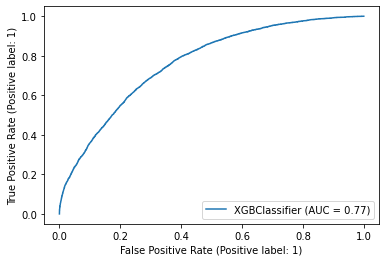

In [154]:
metrics.plot_roc_curve(xgclf, X_test, y_test) 
plt.show()

ROC curve for XGBoost Classifier..................................................


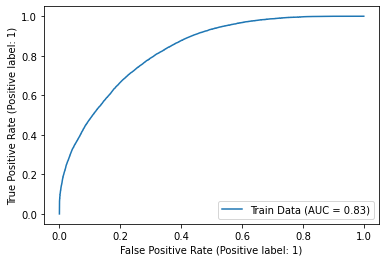

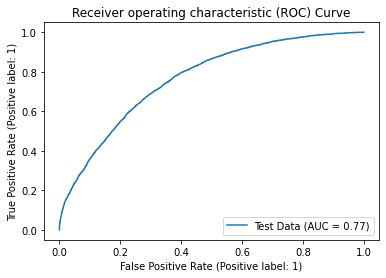

Train Accuracy...................

 0.8511835883369763

Train Confusion Matrix...........

 [[57551   562]
 [ 9855  2031]]

Test Accuracy.....................

 0.8393666666666667

Test Confusion Matrix..............

 [[24498   408]
 [ 4411   683]]


,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.00,NaN,NaN,0.83,0.00,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
0,Logistic Regression,0.83,0.10,0.55,0.17,0.83,0.11,0.53,0.18,0.833469,0.832214,0.834500,0.833714,0.833214,0.833702
0,Decision Tree,0.97,0.85,0.99,0.91,0.76,0.28,0.30,0.29,0.760111,0.764500,0.761500,0.757357,0.761357,0.755840
0,DecisionTree-GridSearchCV,0.84,0.10,0.62,0.17,0.84,0.10,0.61,0.17,0.835955,0.836214,0.837214,0.836071,0.836143,0.834131
0,Bagging,0.96,0.80,0.94,0.86,0.80,0.20,0.36,0.26,0.804612,0.805000,0.805500,0.803357,0.803571,0.805629
0,Random Forest,0.96,0.79,0.94,0.86,0.81,0.20,0.38,0.26,0.806354,0.804857,0.807357,0.805214,0.807286,0.807058
0,Adaptive_Boosting,0.86,0.24,0.73,0.36,0.83,0.16,0.50,0.24,0.826326,0.827000,0.825643,0.824214,0.826500,0.828273
0,Gradient_Boosting,0.84,0.10,0.68,0.17,0.84,0.10,0.65,0.17,0.837826,0.838571,0.838286,0.837571,0.838071,0.836631
0,XG_Boost,0.85,0.17,0.78,0.28,0.84,0.13,0.63,0.22,0.837341,0.837500,0.839000,0.836571,0.836714,0.836917


In [155]:
print('ROC curve for XGBoost Classifier..................................................')
draw_roc(xgclf, X_train, y_train, X_test, y_test)

# Train data And Test Data.......................................................................................
accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test= model_eval(xgclf, X_train, y_train, X_test, y_test)
print("Train Accuracy...................\n\n", accuracy_train)
print('') 
print("Train Confusion Matrix...........\n\n",cnf_matrix_train)
print('')
print("Test Accuracy.....................\n\n",accuracy_test)
print('')
print("Test Confusion Matrix..............\n\n",cnf_matrix_test)


# Store the result ..............................................................................................

temp = store_results("XG_Boost ", y_train, X_train, y_test, X_test, xgclf, 5)
outcome = outcome.append(temp)
outcome

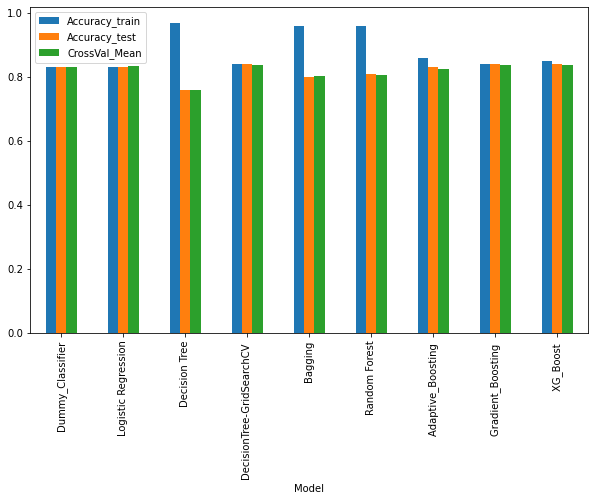

In [156]:
plt.rcParams["figure.figsize"] = (10,6)
outcome.plot(x='Model', y=['Accuracy_train','Accuracy_test','CrossVal_Mean'], kind="bar")
plt.xticks(rotation=90)
plt.show()

In [157]:
#Reset the index
outcome.reset_index(drop=True, inplace=True)
outcome

,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.00,NaN,NaN,0.83,0.00,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
1,Logistic Regression,0.83,0.10,0.55,0.17,0.83,0.11,0.53,0.18,0.833469,0.832214,0.834500,0.833714,0.833214,0.833702
2,Decision Tree,0.97,0.85,0.99,0.91,0.76,0.28,0.30,0.29,0.760111,0.764500,0.761500,0.757357,0.761357,0.755840
3,DecisionTree-GridSearchCV,0.84,0.10,0.62,0.17,0.84,0.10,0.61,0.17,0.835955,0.836214,0.837214,0.836071,0.836143,0.834131
4,Bagging,0.96,0.80,0.94,0.86,0.80,0.20,0.36,0.26,0.804612,0.805000,0.805500,0.803357,0.803571,0.805629
5,Random Forest,0.96,0.79,0.94,0.86,0.81,0.20,0.38,0.26,0.806354,0.804857,0.807357,0.805214,0.807286,0.807058
6,Adaptive_Boosting,0.86,0.24,0.73,0.36,0.83,0.16,0.50,0.24,0.826326,0.827000,0.825643,0.824214,0.826500,0.828273
7,Gradient_Boosting,0.84,0.10,0.68,0.17,0.84,0.10,0.65,0.17,0.837826,0.838571,0.838286,0.837571,0.838071,0.836631
8,XG_Boost,0.85,0.17,0.78,0.28,0.84,0.13,0.63,0.22,0.837341,0.837500,0.839000,0.836571,0.836714,0.836917


# Building models with Feature Engineering


In [158]:
features

Index(['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_model', 'C17', 'C18', 'C19', 'dayofweek', 'day',
       'hour', 'banner_pos_1', 'banner_pos_2', 'banner_pos_3', 'banner_pos_4',
       'banner_pos_5', 'banner_pos_7', 'device_type_1', 'device_type_4',
       'device_type_5', 'device_conn_type_2', 'device_conn_type_3',
       'device_conn_type_5'],
      dtype='object')

### Logistic Regression with Feature Enggineering

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm)
log_reg_fe = logm2.fit()
log_reg_fe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  click   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69973
Model Family:                Gaussian   Df Model:                           25
Link Function:               identity   Scale:                         0.12454
Method:                          IRLS   Log-Likelihood:                -26402.
Date:                Mon, 22 May 2023   Deviance:                       8714.2
Time:                        11:43:50   Pearson chi2:                 8.71e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1227
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0835      0.016     -5.096      0.000      -0.116      -0.051
site_id                0.8091      0.038     21.246      0.000       0.734       0.884
site_domain            0.1960      0.040      4.896      0.000       0.118       0.274
site_category         -0.1457      0.040     -3.669      0.000      -0.224      -0.068
app_id                 1.3600      0.037     36.911      0.000       1.288       1.432
app_domain            -0.7907      0.049    -16.217      0.000      -0.886      -0.695
app_category          -0.5464      0.046    -11.886      0.000      -0.636      -0.456
device_model           0.7085      0.025     28.879      0.000       0.660       0.757
C17                -1.795e-06   2.39e-06     -0.751      0.453   -6.48e-06    2.89e-06
C18                    0.0009      0.001      0.868      0.386      -0.001       0.003
C19                 2.093e-05   3.95e-06      5.295      0.000    1.32e-05    2.87e-05
dayofweek             -0.0004      0.001     -0.561      0.575      -0.002       0.001
day                   -0.0016      0.000     -3.469      0.001      -0.003      -0.001
hour                  -0.0004      0.000     -1.565      0.118      -0.001    8.91e-05
banner_pos_1           0.0026      0.003      0.752      0.452      -0.004       0.009
banner_pos_2          -0.1029      0.079     -1.301      0.193      -0.258       0.052
banner_pos_3           0.2772      0.204      1.360      0.174      -0.122       0.677
banner_pos_4          -0.0687      0.107     -0.645      0.519      -0.277       0.140
banner_pos_5          -0.0582      0.144     -0.404      0.686      -0.341       0.224
banner_pos_7           0.0724      0.043      1.683      0.092      -0.012       0.157
device_type_1          0.0188      0.007      2.812      0.005       0.006       0.032
device_type_4          0.0741      0.013      5.646      0.000       0.048       0.100
device_type_5          0.0820      0.024      3.366      0.001       0.034       0.130
device_conn_type_2     0.0178      0.005      3.476      0.001       0.008       0.028
device_conn_type_3     0.0507      0.007      7.139      0.000       0.037       0.065
device_conn_type_5    -0.0388      0.040     -0.966      0.334      -0.117       0.040
======================================================================================
"""

In [160]:
y_train_pred = log_reg_fe.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'y':y_train, 'y_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

[[57669   462]
 [11156   712]]
0.8340262003742911


In [161]:
def sm_model_evaluation (model, x_test, y_test):
    '''
    model = sm model
    y_test = series of labels 
    columns = list of columns in features
    x_test = test dataframe 
    '''
    X_sm = sm.add_constant(x_test)
    y_pred = log_reg_fe.predict(X_sm)
    y_train_pred_final = pd.DataFrame({'y':y_test, 'y_Prob':y_pred})
    y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
    # Let's check the overall accuracy.
    print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))
    confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
    print(confusion)

In [162]:
sm_model_evaluation(log_reg_fe, X_test, y_test) 

0.8318
[[24654   234]
 [ 4812   300]]


In [163]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,151.00
1,site_id,8.04
2,site_domain,7.73
5,app_domain,3.25
4,app_id,3.20
6,app_category,2.58
3,site_category,1.92
21,device_type_4,1.83
20,device_type_1,1.80
7,device_model,1.51


## VIF - OK , Notice High Probability values of app_category, hour and dayofweek , to be removed and build the model.**

In [164]:
X_train_sm.drop(['app_category','hour','day', 'dayofweek'], axis=1, inplace= True)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_reg_fe2 = logm2.fit()
log_reg_fe2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  click   No. Observations:                69999
Model:                            GLM   Df Residuals:                    69977
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27959.
Date:                Mon, 22 May 2023   Deviance:                       55918.
Time:                        11:43:55   Pearson chi2:                 6.82e+04
No. Iterations:                    20   Pseudo R-squ. (CS):             0.1055
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.6077      0.104    -44.151      0.000      -4.812      -4.403
site_id                4.4709      0.294     15.187      0.000       3.894       5.048
site_domain            1.6545      0.311      5.327      0.000       1.046       2.263
site_category         -2.5884      0.305     -8.479      0.000      -3.187      -1.990
app_id                 9.4083      0.259     36.304      0.000       8.900       9.916
app_domain            -2.6056      0.443     -5.876      0.000      -3.475      -1.737
device_model           5.3672      0.191     28.043      0.000       4.992       5.742
C17                   -0.0001   1.76e-05     -6.821      0.000      -0.000   -8.55e-05
C18                   -0.0106      0.009     -1.183      0.237      -0.028       0.007
C19                    0.0002   2.96e-05      5.693      0.000       0.000       0.000
banner_pos_1          -0.0512      0.026     -1.974      0.048      -0.102      -0.000
banner_pos_2          -1.0400      0.751     -1.385      0.166      -2.511       0.431
banner_pos_3           1.5643      1.240      1.262      0.207      -0.865       3.994
banner_pos_4          -0.7403      1.052     -0.703      0.482      -2.803       1.322
banner_pos_5         -19.3432   1.15e+04     -0.002      0.999   -2.25e+04    2.25e+04
banner_pos_7           0.3104      0.326      0.952      0.341      -0.329       0.950
device_type_1          0.2866      0.050      5.775      0.000       0.189       0.384
device_type_4          0.7467      0.117      6.390      0.000       0.518       0.976
device_type_5          0.7591      0.241      3.147      0.002       0.286       1.232
device_conn_type_2     0.1582      0.044      3.568      0.000       0.071       0.245
device_conn_type_3     0.2001      0.086      2.329      0.020       0.032       0.368
device_conn_type_5    -0.5518      0.592     -0.931      0.352      -1.713       0.609
======================================================================================
"""

## Now probability of all the variables looks significant at least 5% .Recheck again VIF.

In [165]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,73.41
1,site_id,8.04
2,site_domain,7.73
5,app_domain,3.23
4,app_id,2.59
17,device_type_4,1.71
16,device_type_1,1.71
3,site_category,1.68
6,device_model,1.50
20,device_conn_type_3,1.44


### Finding best threshold for classification.

In [166]:
y_train_pred = log_reg_fe2.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'y':y_train, 'y_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

[[57264   867]
 [10776  1092]]
0.8336690524150345


In [167]:
col = list(X_train_sm.columns)
col.remove('const')
sm_model_evaluation(log_reg_fe2, X_test, y_test) 

0.8318
[[24654   234]
 [ 4812   300]]


In [168]:
numbers = [float(x)/20 for x in range(20)]
print(numbers)
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.y_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


,y,y_Prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
27322,0,0.139434,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31187,0,0.088577,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65409,0,0.201449,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14297,1,0.138684,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15664,0,0.111592,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [169]:
cutoff_df = pd.DataFrame( columns = ['Thresold_prob','Accuracy','Recall','Precision'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    Accuracy = (TP + TN)/total1
    
    Recall = TP / (TP+FN)
    Precision = TP / (TP+FP)
    cutoff_df.loc[i] =[ i ,Accuracy, Recall, Precision]
cutoff_df

,Thresold_prob,Accuracy,Recall,Precision
0.00,0.00,0.169545,1.000000,0.169545
0.05,0.05,0.301404,0.975312,0.192330
0.10,0.10,0.491850,0.893832,0.236164
0.15,0.15,0.624837,0.772582,0.280132
0.20,0.20,0.723682,0.595130,0.326991
0.25,0.25,0.778654,0.433940,0.369812
0.30,0.30,0.804983,0.322885,0.405631
0.35,0.35,0.821169,0.237951,0.448396
0.40,0.40,0.828798,0.177620,0.486611
0.45,0.45,0.832512,0.130688,0.524341


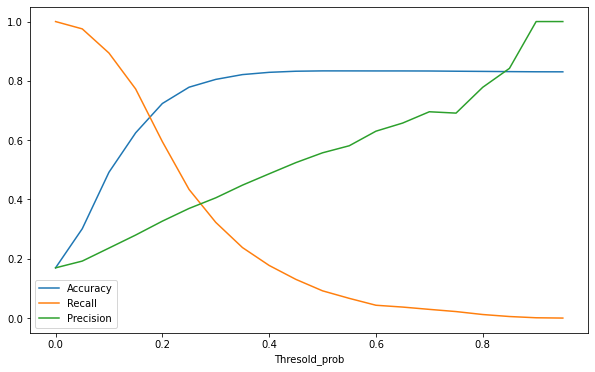

In [170]:
cutoff_df.plot.line(x='Thresold_prob', y=['Accuracy','Recall','Precision'])
plt.show() 

In [171]:
y_train_pred_final['final_predicted'] = y_train_pred_final.y_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,y,y_Prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
27322,0,0.139434,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31187,0,0.088577,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65409,0,0.201449,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14297,1,0.138684,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15664,0,0.111592,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [172]:
X_train_sm.drop('const', axis= 1, inplace= True)
X_test = X_test[X_train_sm.columns] # Include only column after dropping from train data 
print(X_train_sm.shape)
print(X_test.shape)

(69999, 21)
(30000, 21)


In [173]:
logisticR_final_fe = LogisticRegression() 
logisticR_final_fe.fit(X_train_sm, y_train)

LogisticRegression()

ROC curve for Logistic Regression Feature Eng. Classifier...................................................


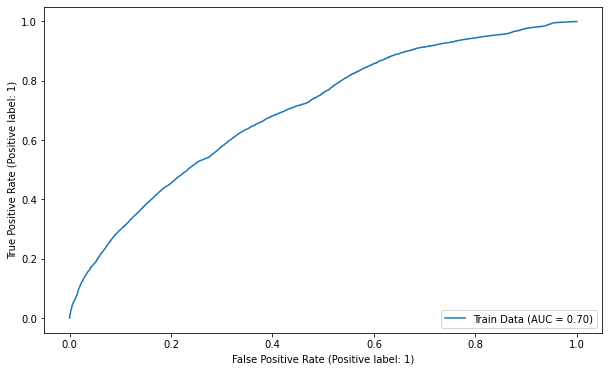

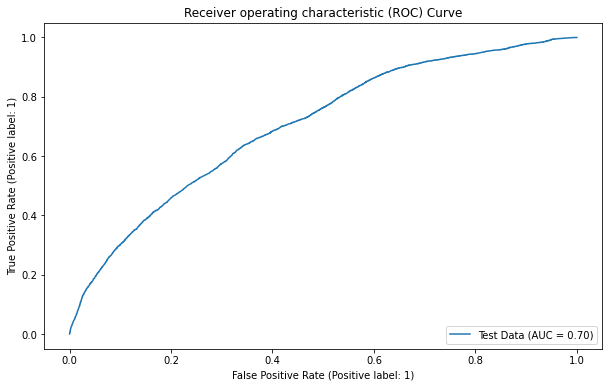

Train Accuracy...................

 0.8329833283332619

Train Confusion Matrix...........

 [[57661   470]
 [11221   647]]

Test Accuracy.....................

 0.8299333333333333

Test Confusion Matrix..............

 [[24631   257]
 [ 4845   267]]


,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.00,NaN,NaN,0.83,0.00,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
1,Logistic Regression,0.83,0.10,0.55,0.17,0.83,0.11,0.53,0.18,0.833469,0.832214,0.834500,0.833714,0.833214,0.833702
2,Decision Tree,0.97,0.85,0.99,0.91,0.76,0.28,0.30,0.29,0.760111,0.764500,0.761500,0.757357,0.761357,0.755840
3,DecisionTree-GridSearchCV,0.84,0.10,0.62,0.17,0.84,0.10,0.61,0.17,0.835955,0.836214,0.837214,0.836071,0.836143,0.834131
4,Bagging,0.96,0.80,0.94,0.86,0.80,0.20,0.36,0.26,0.804612,0.805000,0.805500,0.803357,0.803571,0.805629
5,Random Forest,0.96,0.79,0.94,0.86,0.81,0.20,0.38,0.26,0.806354,0.804857,0.807357,0.805214,0.807286,0.807058
6,Adaptive_Boosting,0.86,0.24,0.73,0.36,0.83,0.16,0.50,0.24,0.826326,0.827000,0.825643,0.824214,0.826500,0.828273
7,Gradient_Boosting,0.84,0.10,0.68,0.17,0.84,0.10,0.65,0.17,0.837826,0.838571,0.838286,0.837571,0.838071,0.836631
8,XG_Boost,0.85,0.17,0.78,0.28,0.84,0.13,0.63,0.22,0.837341,0.837500,0.839000,0.836571,0.836714,0.836917
0,LogRegression_FeatureEng.,0.83,0.05,0.58,0.09,0.83,0.05,0.51,0.09,0.832183,0.831643,0.834000,0.832857,0.831500,0.830916


In [174]:
print('ROC curve for Logistic Regression Feature Eng. Classifier...................................................')
draw_roc(logisticR_final_fe, X_train_sm, y_train, X_test, y_test)

# Train data And Test Data.......................................................................................
accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test= model_eval(logisticR_final_fe, X_train_sm, y_train, X_test, y_test)
print("Train Accuracy...................\n\n", accuracy_train)
print('') 
print("Train Confusion Matrix...........\n\n",cnf_matrix_train)
print('')
print("Test Accuracy.....................\n\n",accuracy_test)
print('')
print("Test Confusion Matrix..............\n\n",cnf_matrix_test)


# Store the result ..............................................................................................

temp = store_results("LogRegression_FeatureEng.", y_train, X_train_sm, y_test, X_test, logisticR_final_fe, 5)
outcome = outcome.append(temp)
outcome

## Decision Trees with Feature Engineering

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)
model_DT_fe = DecisionTreeClassifier(random_state=42)
model_DT_fe.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [176]:
#Feature Importance
feature_importances_dt = model_DT_fe.feature_importances_
feature_importances_dt

array([1.25603752e-01, 2.89633607e-02, 6.57979236e-03, 4.19262341e-02,
       8.25028281e-03, 3.83959117e-03, 2.70885023e-01, 7.55990321e-02,
       2.01916941e-02, 4.05056271e-02, 6.29280388e-02, 7.71485689e-02,
       2.17220907e-01, 5.61440891e-03, 6.94531536e-05, 5.13308805e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.15000886e-03,
       1.49648387e-03, 1.55707732e-04, 8.89027629e-03, 1.74875169e-03,
       1.81673926e-04])

In [177]:
df_DT_fe = pd.DataFrame({'features': features, 'importance': feature_importances_dt})

In [178]:
df_DT_fe.sort_values('importance',ascending=False)

,features,importance
6,device_model,0.270885
12,hour,0.217221
0,site_id,0.125604
11,day,0.077149
7,C17,0.075599
10,dayofweek,0.062928
3,app_id,0.041926
9,C19,0.040506
1,site_domain,0.028963
8,C18,0.020192


In [179]:
 # Select only features with > 0.025 value
df_DT_fe = df_DT_fe[df_DT_fe.importance  > 0.025]
rf_cols = []
for col in list(X_train.columns):
    if col in list(df_DT_fe.features):
        rf_cols.append(col)

In [180]:
rf_cols

['site_id',
 'site_domain',
 'app_id',
 'device_model',
 'C17',
 'C19',
 'dayofweek',
 'day',
 'hour']

In [181]:
X_train = X_train[rf_cols]
X_test = X_test[rf_cols]
model_dt_fe_new = model_DT_fe.fit(X_train[rf_cols], y_train)

ROC curve for Decision Tree Feature Eng. Classifier......................................................


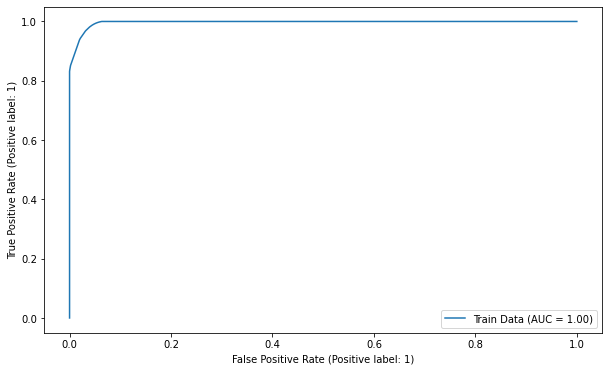

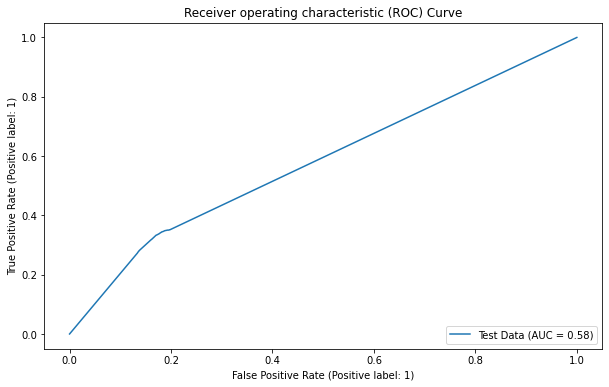

Train Accuracy...................

 0.9732281889741282

Train Confusion Matrix...........

 [[58011   120]
 [ 1754 10114]]

Test Accuracy.....................

 0.7636666666666667

Test Confusion Matrix..............

 [[21473  3415]
 [ 3675  1437]]


,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.00,NaN,NaN,0.83,0.00,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
1,Logistic Regression,0.83,0.10,0.55,0.17,0.83,0.11,0.53,0.18,0.833469,0.832214,0.834500,0.833714,0.833214,0.833702
2,Decision Tree,0.97,0.85,0.99,0.91,0.76,0.28,0.30,0.29,0.760111,0.764500,0.761500,0.757357,0.761357,0.755840
3,DecisionTree-GridSearchCV,0.84,0.10,0.62,0.17,0.84,0.10,0.61,0.17,0.835955,0.836214,0.837214,0.836071,0.836143,0.834131
4,Bagging,0.96,0.80,0.94,0.86,0.80,0.20,0.36,0.26,0.804612,0.805000,0.805500,0.803357,0.803571,0.805629
5,Random Forest,0.96,0.79,0.94,0.86,0.81,0.20,0.38,0.26,0.806354,0.804857,0.807357,0.805214,0.807286,0.807058
6,Adaptive_Boosting,0.86,0.24,0.73,0.36,0.83,0.16,0.50,0.24,0.826326,0.827000,0.825643,0.824214,0.826500,0.828273
7,Gradient_Boosting,0.84,0.10,0.68,0.17,0.84,0.10,0.65,0.17,0.837826,0.838571,0.838286,0.837571,0.838071,0.836631
8,XG_Boost,0.85,0.17,0.78,0.28,0.84,0.13,0.63,0.22,0.837341,0.837500,0.839000,0.836571,0.836714,0.836917
0,LogRegression_FeatureEng.,0.83,0.05,0.58,0.09,0.83,0.05,0.51,0.09,0.832183,0.831643,0.834000,0.832857,0.831500,0.830916


In [182]:
print('ROC curve for Decision Tree Feature Eng. Classifier......................................................')
draw_roc(model_dt_fe_new, X_train, y_train, X_test, y_test)

# Train data And Test Data.......................................................................................
accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test= model_eval(model_dt_fe_new, X_train, y_train, X_test, y_test)
print("Train Accuracy...................\n\n", accuracy_train)
print('') 
print("Train Confusion Matrix...........\n\n",cnf_matrix_train)
print('')
print("Test Accuracy.....................\n\n",accuracy_test)
print('')
print("Test Confusion Matrix..............\n\n",cnf_matrix_test)


# Store the result ..............................................................................................

temp = store_results("DecisionTree_FeatureEngg.", y_train, X_train, y_test, X_test, model_dt_fe_new, 5)
outcome = outcome.append(temp)
outcome

## Random Forests with Feature Engineering

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)
model_rf_fe = RandomForestClassifier(n_estimators=10, max_features=7, random_state=42)
model_rf_fe.fit(X_train, y_train)

RandomForestClassifier(max_features=7, n_estimators=10, random_state=42)

In [184]:
#Feature Importance
feature_importances_rf = model_rf_fe.feature_importances_
df_rf_fe = pd.DataFrame({'features': features, 'importance': feature_importances_rf})

In [185]:
df_rf_fe.sort_values('importance',ascending=False)

,features,importance
6,device_model,0.306360
12,hour,0.230379
0,site_id,0.080623
7,C17,0.067915
11,day,0.061422
1,site_domain,0.054780
10,dayofweek,0.053531
3,app_id,0.039609
9,C19,0.037144
8,C18,0.017576


In [186]:
 # Select only features with > 0.025 value
df_rf_fe = df_rf_fe[df_rf_fe.importance  > 0.025]
rf_cols = []
for col in list(X_train.columns):
    if col in list(df_rf_fe.features):
        rf_cols.append(col)

rf_cols        
        

['site_id',
 'site_domain',
 'app_id',
 'device_model',
 'C17',
 'C19',
 'dayofweek',
 'day',
 'hour']

In [187]:
X_train = X_train[rf_cols]
X_test = X_test[rf_cols]
model_rf_fe_new = model_rf_fe.fit(X_train[rf_cols], y_train)

ROC curve for Random Forest Feature Eng. Classifier......................................................


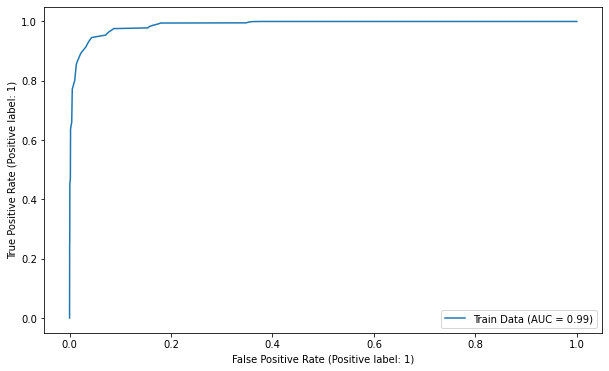

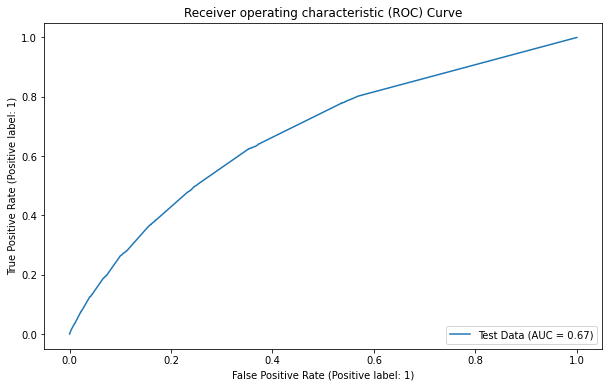

Train Accuracy...................

 0.9576851097872827

Train Confusion Matrix...........

 [[57544   587]
 [ 2375  9493]]

Test Accuracy.....................

 0.8025333333333333

Test Confusion Matrix..............

 [[23061  1827]
 [ 4097  1015]]


,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.00,NaN,NaN,0.83,0.00,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
1,Logistic Regression,0.83,0.10,0.55,0.17,0.83,0.11,0.53,0.18,0.833469,0.832214,0.834500,0.833714,0.833214,0.833702
2,Decision Tree,0.97,0.85,0.99,0.91,0.76,0.28,0.30,0.29,0.760111,0.764500,0.761500,0.757357,0.761357,0.755840
3,DecisionTree-GridSearchCV,0.84,0.10,0.62,0.17,0.84,0.10,0.61,0.17,0.835955,0.836214,0.837214,0.836071,0.836143,0.834131
4,Bagging,0.96,0.80,0.94,0.86,0.80,0.20,0.36,0.26,0.804612,0.805000,0.805500,0.803357,0.803571,0.805629
5,Random Forest,0.96,0.79,0.94,0.86,0.81,0.20,0.38,0.26,0.806354,0.804857,0.807357,0.805214,0.807286,0.807058
6,Adaptive_Boosting,0.86,0.24,0.73,0.36,0.83,0.16,0.50,0.24,0.826326,0.827000,0.825643,0.824214,0.826500,0.828273
7,Gradient_Boosting,0.84,0.10,0.68,0.17,0.84,0.10,0.65,0.17,0.837826,0.838571,0.838286,0.837571,0.838071,0.836631
8,XG_Boost,0.85,0.17,0.78,0.28,0.84,0.13,0.63,0.22,0.837341,0.837500,0.839000,0.836571,0.836714,0.836917
0,LogRegression_FeatureEng.,0.83,0.05,0.58,0.09,0.83,0.05,0.51,0.09,0.832183,0.831643,0.834000,0.832857,0.831500,0.830916


In [188]:
print('ROC curve for Random Forest Feature Eng. Classifier......................................................')
draw_roc(model_rf_fe_new, X_train, y_train, X_test, y_test)

# Train data And Test Data.......................................................................................
accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test= model_eval(model_rf_fe_new, X_train, y_train, X_test, y_test)
print("Train Accuracy...................\n\n", accuracy_train)
print('') 
print("Train Confusion Matrix...........\n\n",cnf_matrix_train)
print('')
print("Test Accuracy.....................\n\n",accuracy_test)
print('')
print("Test Confusion Matrix..............\n\n",cnf_matrix_test)


# Store the result ..............................................................................................

temp = store_results("RandomForest_FeatureEng", y_train, X_train, y_test, X_test, model_rf_fe_new, 5)
outcome = outcome.append(temp)
outcome

### ADABoosting with Feature Engineering

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)
model_ada_fe = AdaBoostClassifier(base_est, n_estimators=100, random_state=42, learning_rate=1.0)
model_ada_fe.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100, random_state=42)

In [190]:
#Feature Importance
feature_importances_ada = model_ada_fe.feature_importances_
df_ada_fe = pd.DataFrame({'features': features, 'importance': feature_importances_ada})

In [191]:
df_ada_fe.sort_values('importance',ascending=False)

,features,importance
6,device_model,0.267732
12,hour,0.134411
7,C17,0.101900
0,site_id,0.091381
3,app_id,0.085772
1,site_domain,0.076434
11,day,0.053603
10,dayofweek,0.051869
9,C19,0.041465
8,C18,0.018403


In [192]:
 # Select only features with > 0.025 value
df_ada_fe = df_ada_fe[df_ada_fe.importance  > 0.025]
rf_cols = []
for col in list(X_train.columns):
    if col in list(df_ada_fe.features):
        rf_cols.append(col)

rf_cols        

['site_id',
 'site_domain',
 'app_id',
 'device_model',
 'C17',
 'C19',
 'dayofweek',
 'day',
 'hour']

In [193]:
X_train = X_train[rf_cols]
X_test = X_test[rf_cols]
model_ada_fe_new = model_ada_fe.fit(X_train[rf_cols], y_train)

ROC curve for ADABoost Feature Eng. Classifier......................................................


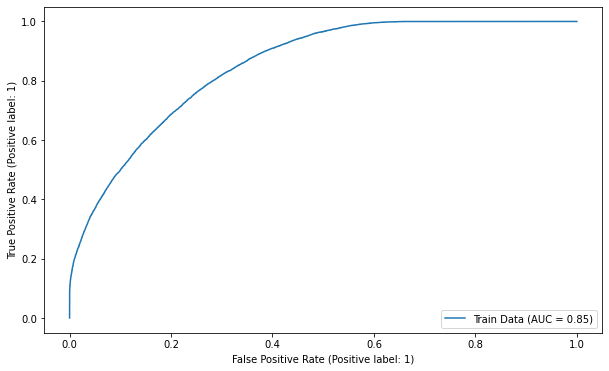

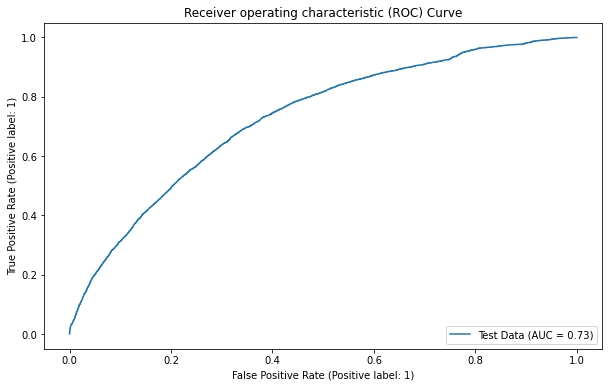

Train Accuracy...................

 0.85628366119516

Train Confusion Matrix...........

 [[56997  1134]
 [ 8926  2942]]

Test Accuracy.....................

 0.8263333333333334

Test Confusion Matrix..............

 [[23970   918]
 [ 4292   820]]


,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.00,NaN,NaN,0.83,0.00,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
1,Logistic Regression,0.83,0.10,0.55,0.17,0.83,0.11,0.53,0.18,0.833469,0.832214,0.834500,0.833714,0.833214,0.833702
2,Decision Tree,0.97,0.85,0.99,0.91,0.76,0.28,0.30,0.29,0.760111,0.764500,0.761500,0.757357,0.761357,0.755840
3,DecisionTree-GridSearchCV,0.84,0.10,0.62,0.17,0.84,0.10,0.61,0.17,0.835955,0.836214,0.837214,0.836071,0.836143,0.834131
4,Bagging,0.96,0.80,0.94,0.86,0.80,0.20,0.36,0.26,0.804612,0.805000,0.805500,0.803357,0.803571,0.805629
5,Random Forest,0.96,0.79,0.94,0.86,0.81,0.20,0.38,0.26,0.806354,0.804857,0.807357,0.805214,0.807286,0.807058
6,Adaptive_Boosting,0.86,0.24,0.73,0.36,0.83,0.16,0.50,0.24,0.826326,0.827000,0.825643,0.824214,0.826500,0.828273
7,Gradient_Boosting,0.84,0.10,0.68,0.17,0.84,0.10,0.65,0.17,0.837826,0.838571,0.838286,0.837571,0.838071,0.836631
8,XG_Boost,0.85,0.17,0.78,0.28,0.84,0.13,0.63,0.22,0.837341,0.837500,0.839000,0.836571,0.836714,0.836917
0,LogRegression_FeatureEng.,0.83,0.05,0.58,0.09,0.83,0.05,0.51,0.09,0.832183,0.831643,0.834000,0.832857,0.831500,0.830916


In [194]:
print('ROC curve for ADABoost Feature Eng. Classifier......................................................')
draw_roc(model_ada_fe_new, X_train, y_train, X_test, y_test)

# Train data And Test Data.......................................................................................
accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test= model_eval(model_ada_fe_new, X_train, y_train, X_test, y_test)
print("Train Accuracy...................\n\n", accuracy_train)
print('') 
print("Train Confusion Matrix...........\n\n",cnf_matrix_train)
print('')
print("Test Accuracy.....................\n\n",accuracy_test)
print('')
print("Test Confusion Matrix..............\n\n",cnf_matrix_test)


# Store the result ..............................................................................................

temp = store_results("ADABoost_Feature_Eng.", y_train, X_train, y_test, X_test, model_ada_fe_new, 5)
outcome = outcome.append(temp)
outcome

## Gradient Boosting with Feature Engineering

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)
model_gbc_fe = GradientBoostingClassifier(random_state=42)
model_gbc_fe.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [196]:
#Feature Importance
feature_importances_gbc = model_gbc_fe.feature_importances_
df_gbc_fe = pd.DataFrame({'features': features, 'importance': feature_importances_gbc})

In [197]:
df_gbc_fe.sort_values('importance',ascending=False)

,features,importance
0,site_id,0.528365
3,app_id,0.200247
6,device_model,0.178139
1,site_domain,0.039950
7,C17,0.015308
5,app_category,0.010750
9,C19,0.006951
12,hour,0.006878
11,day,0.003292
19,device_type_1,0.002850


In [198]:
 # Select only features with > 0.025 value
df_gbc_fe = df_gbc_fe[df_gbc_fe.importance  > 0.025]
rf_cols = []
for col in list(X_train.columns):
    if col in list(df_gbc_fe.features):
        rf_cols.append(col)

rf_cols        

['site_id', 'site_domain', 'app_id', 'device_model']

In [199]:
X_train = X_train[rf_cols]
X_test = X_test[rf_cols]
model_gbc_fe_new = model_gbc_fe.fit(X_train[rf_cols], y_train)

ROC curve for Gradient Boost Feature Engg................................................


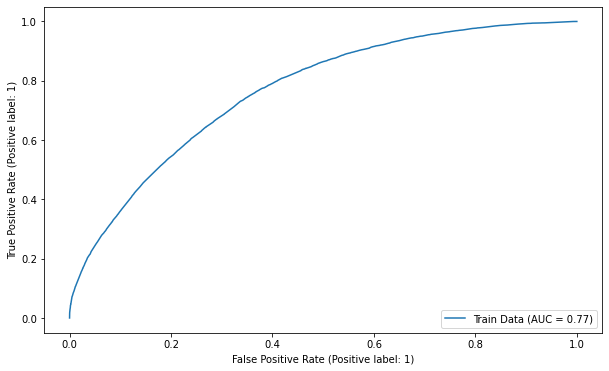

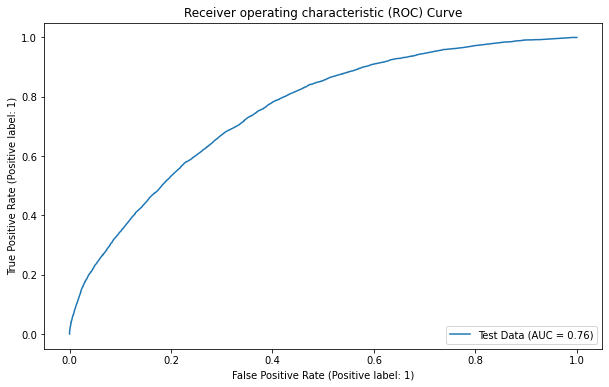

Train Accuracy...................

 0.8385691224160345

Train Confusion Matrix...........

 [[57755   376]
 [10924   944]]

Test Accuracy.....................

 0.8348

Test Confusion Matrix..............

 [[24664   224]
 [ 4732   380]]


,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.00,NaN,NaN,0.83,0.00,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
1,Logistic Regression,0.83,0.10,0.55,0.17,0.83,0.11,0.53,0.18,0.833469,0.832214,0.834500,0.833714,0.833214,0.833702
2,Decision Tree,0.97,0.85,0.99,0.91,0.76,0.28,0.30,0.29,0.760111,0.764500,0.761500,0.757357,0.761357,0.755840
3,DecisionTree-GridSearchCV,0.84,0.10,0.62,0.17,0.84,0.10,0.61,0.17,0.835955,0.836214,0.837214,0.836071,0.836143,0.834131
4,Bagging,0.96,0.80,0.94,0.86,0.80,0.20,0.36,0.26,0.804612,0.805000,0.805500,0.803357,0.803571,0.805629
5,Random Forest,0.96,0.79,0.94,0.86,0.81,0.20,0.38,0.26,0.806354,0.804857,0.807357,0.805214,0.807286,0.807058
6,Adaptive_Boosting,0.86,0.24,0.73,0.36,0.83,0.16,0.50,0.24,0.826326,0.827000,0.825643,0.824214,0.826500,0.828273
7,Gradient_Boosting,0.84,0.10,0.68,0.17,0.84,0.10,0.65,0.17,0.837826,0.838571,0.838286,0.837571,0.838071,0.836631
8,XG_Boost,0.85,0.17,0.78,0.28,0.84,0.13,0.63,0.22,0.837341,0.837500,0.839000,0.836571,0.836714,0.836917
0,LogRegression_FeatureEng.,0.83,0.05,0.58,0.09,0.83,0.05,0.51,0.09,0.832183,0.831643,0.834000,0.832857,0.831500,0.830916


In [200]:
print('ROC curve for Gradient Boost Feature Engg................................................')
draw_roc(model_gbc_fe_new, X_train, y_train, X_test, y_test)

# Train data And Test Data.......................................................................................
accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test= model_eval(model_gbc_fe_new, X_train, y_train, X_test, y_test)
print("Train Accuracy...................\n\n", accuracy_train)
print('') 
print("Train Confusion Matrix...........\n\n",cnf_matrix_train)
print('')
print("Test Accuracy.....................\n\n",accuracy_test)
print('')
print("Test Confusion Matrix..............\n\n",cnf_matrix_test)


# Store the result ..............................................................................................

temp = store_results("GradientBoost_FeatureEngg.", y_train, X_train, y_test, X_test, model_gbc_fe_new, 5)
outcome = outcome.append(temp)
outcome 

### XGboost with Feature Engineering

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)
xgclf_fe = xgb.XGBClassifier()
xgclf_fe.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [202]:
#Feature Importance
feature_importances_xgb = xgclf_fe.feature_importances_
df_xgb_fe = pd.DataFrame({'features': features, 'importance': feature_importances_xgb})

In [203]:
df_xgb_fe.sort_values('importance',ascending=False)

,features,importance
0,site_id,0.258679
3,app_id,0.113517
20,device_type_4,0.057860
1,site_domain,0.049776
6,device_model,0.049399
19,device_type_1,0.046407
4,app_domain,0.040225
5,app_category,0.035174
22,device_conn_type_2,0.034710
2,site_category,0.034423


In [204]:
 # Select only features with > 0.025 value
df_xgb_fe = df_xgb_fe[df_xgb_fe.importance  > 0.025]
rf_cols = []
for col in list(X_train.columns):
    if col in list(df_xgb_fe.features):
        rf_cols.append(col)

rf_cols     

['site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_model',
 'C17',
 'C18',
 'C19',
 'day',
 'banner_pos_1',
 'device_type_1',
 'device_type_4',
 'device_conn_type_2',
 'device_conn_type_3']

In [205]:
X_train = X_train[rf_cols]
X_test = X_test[rf_cols]
xgclf_fe_new = xgclf_fe.fit(X_train[rf_cols], y_train)

ROC curve for XG Boost Feature Engg................................................


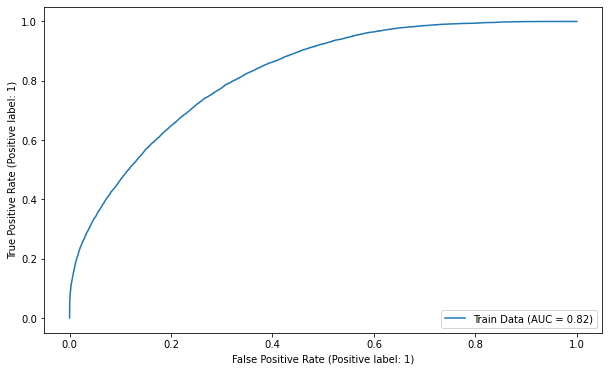

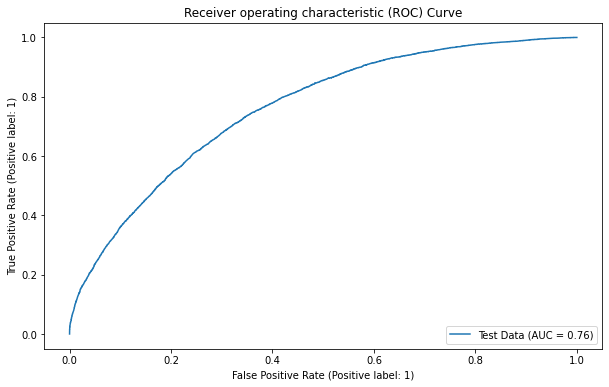

Train Accuracy...................

 0.8514835926227518

Train Confusion Matrix...........

 [[57518   613]
 [ 9783  2085]]

Test Accuracy.....................

 0.8376666666666667

Test Confusion Matrix..............

 [[24447   441]
 [ 4429   683]]


,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.00,NaN,NaN,0.83,0.00,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
1,Logistic Regression,0.83,0.10,0.55,0.17,0.83,0.11,0.53,0.18,0.833469,0.832214,0.834500,0.833714,0.833214,0.833702
2,Decision Tree,0.97,0.85,0.99,0.91,0.76,0.28,0.30,0.29,0.760111,0.764500,0.761500,0.757357,0.761357,0.755840
3,DecisionTree-GridSearchCV,0.84,0.10,0.62,0.17,0.84,0.10,0.61,0.17,0.835955,0.836214,0.837214,0.836071,0.836143,0.834131
4,Bagging,0.96,0.80,0.94,0.86,0.80,0.20,0.36,0.26,0.804612,0.805000,0.805500,0.803357,0.803571,0.805629
5,Random Forest,0.96,0.79,0.94,0.86,0.81,0.20,0.38,0.26,0.806354,0.804857,0.807357,0.805214,0.807286,0.807058
6,Adaptive_Boosting,0.86,0.24,0.73,0.36,0.83,0.16,0.50,0.24,0.826326,0.827000,0.825643,0.824214,0.826500,0.828273
7,Gradient_Boosting,0.84,0.10,0.68,0.17,0.84,0.10,0.65,0.17,0.837826,0.838571,0.838286,0.837571,0.838071,0.836631
8,XG_Boost,0.85,0.17,0.78,0.28,0.84,0.13,0.63,0.22,0.837341,0.837500,0.839000,0.836571,0.836714,0.836917
0,LogRegression_FeatureEng.,0.83,0.05,0.58,0.09,0.83,0.05,0.51,0.09,0.832183,0.831643,0.834000,0.832857,0.831500,0.830916


In [206]:
print('ROC curve for XG Boost Feature Engg................................................')
draw_roc(xgclf_fe_new, X_train, y_train, X_test, y_test)

# Train data And Test Data.......................................................................................
accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test= model_eval(xgclf_fe_new, X_train, y_train, X_test, y_test)
print("Train Accuracy...................\n\n", accuracy_train)
print('') 
print("Train Confusion Matrix...........\n\n",cnf_matrix_train)
print('')
print("Test Accuracy.....................\n\n",accuracy_test)
print('')
print("Test Confusion Matrix..............\n\n",cnf_matrix_test)


# Store the result ..............................................................................................

temp = store_results("XGBoost_FeatureEngg.", y_train, X_train, y_test, X_test, xgclf_fe_new, 5)
outcome = outcome.append(temp)
outcome 

## BUILDING MODELS WITH BALANCED DATA 

## As discussed at the start Data is imbalanced, we will use for balanced data set for all modules

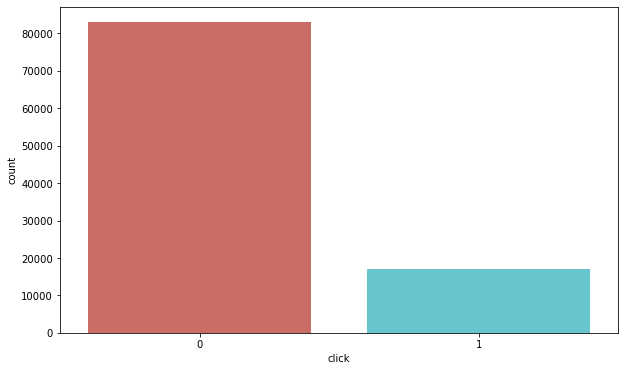

In [207]:
sns.countplot(x='click',data=df_data, palette='hls')
plt.show();

1. SMOTE is only applied to train data only.**
2. Therefore, Balanced Train data set after applying SMOTE and original Test data without balancing are used for comparison.**

In [208]:
# split X and y into training and testing sets 70:30 ratio 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [209]:
#pip install imblearn  

In [210]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [211]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

## Let's check the shape before / after SMOTE
print('Before',X_train.shape)
print('After',X_train_res.shape)

Before (69999, 25)
After (116262, 25)


In [212]:
pd.DataFrame(y_train_res).value_counts() # Now the Data are balanced

0    58131
1    58131
dtype: int64

## NOW DATA IS BALANCED

### DECISION TREE  With SMOTE

In [213]:
model_dt_sm = DecisionTreeClassifier(random_state=42)
model_dt_sm.fit(X_train_res,y_train_res)

DecisionTreeClassifier(random_state=42)

ROC curve for Decision Tree Balanced Data classifier...............................................


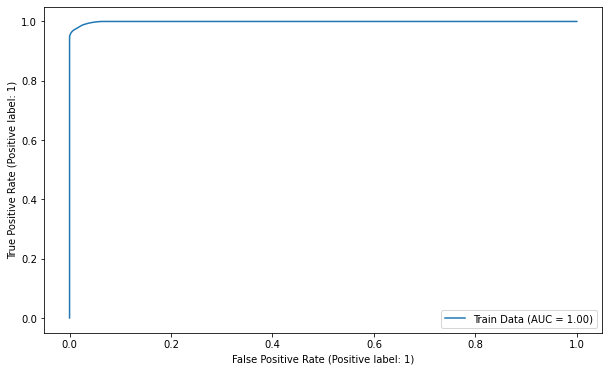

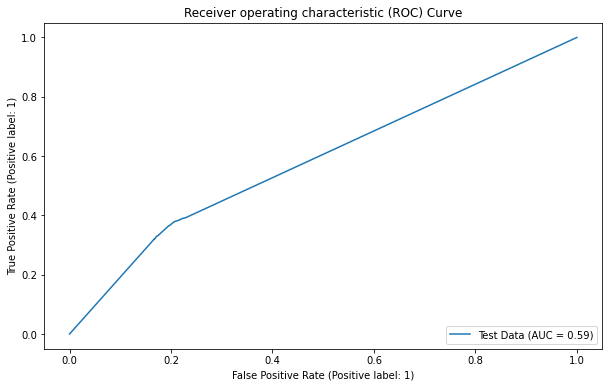

Train Accuracy...................

 0.9813696650668318

Train Confusion Matrix...........

 [[57652   479]
 [ 1687 56444]]

Test Accuracy.....................

 0.7406666666666667

Test Confusion Matrix..............

 [[20511  4377]
 [ 3403  1709]]


,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.00,NaN,NaN,0.83,0.00,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
1,Logistic Regression,0.83,0.10,0.55,0.17,0.83,0.11,0.53,0.18,0.833469,0.832214,0.834500,0.833714,0.833214,0.833702
2,Decision Tree,0.97,0.85,0.99,0.91,0.76,0.28,0.30,0.29,0.760111,0.764500,0.761500,0.757357,0.761357,0.755840
3,DecisionTree-GridSearchCV,0.84,0.10,0.62,0.17,0.84,0.10,0.61,0.17,0.835955,0.836214,0.837214,0.836071,0.836143,0.834131
4,Bagging,0.96,0.80,0.94,0.86,0.80,0.20,0.36,0.26,0.804612,0.805000,0.805500,0.803357,0.803571,0.805629
5,Random Forest,0.96,0.79,0.94,0.86,0.81,0.20,0.38,0.26,0.806354,0.804857,0.807357,0.805214,0.807286,0.807058
6,Adaptive_Boosting,0.86,0.24,0.73,0.36,0.83,0.16,0.50,0.24,0.826326,0.827000,0.825643,0.824214,0.826500,0.828273
7,Gradient_Boosting,0.84,0.10,0.68,0.17,0.84,0.10,0.65,0.17,0.837826,0.838571,0.838286,0.837571,0.838071,0.836631
8,XG_Boost,0.85,0.17,0.78,0.28,0.84,0.13,0.63,0.22,0.837341,0.837500,0.839000,0.836571,0.836714,0.836917
0,LogRegression_FeatureEng.,0.83,0.05,0.58,0.09,0.83,0.05,0.51,0.09,0.832183,0.831643,0.834000,0.832857,0.831500,0.830916


In [214]:
print('ROC curve for Decision Tree Balanced Data classifier...............................................')
draw_roc(model_dt_sm, X_train_res, y_train_res, X_test, y_test)

# Train data And Test Data.......................................................................................
accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test= model_eval(model_dt_sm, X_train_res, y_train_res, X_test, y_test)
print("Train Accuracy...................\n\n", accuracy_train)
print('') 
print("Train Confusion Matrix...........\n\n",cnf_matrix_train)
print('')
print("Test Accuracy.....................\n\n",accuracy_test)
print('')
print("Test Confusion Matrix..............\n\n",cnf_matrix_test)


# Store the result ..............................................................................................

temp = store_results("DecisionTree_Balanced", y_train_res, X_train_res, y_test, X_test, model_dt_sm, 5)
outcome = outcome.append(temp)
outcome 

### RANDOM FOREST  With SMOTE

In [215]:
model_rf_sm = RandomForestClassifier(random_state=42)
model_rf_sm.fit(X_train_res,y_train_res)

RandomForestClassifier(random_state=42)

ROC curve for Random Forest Balanced Data classifier...............................................


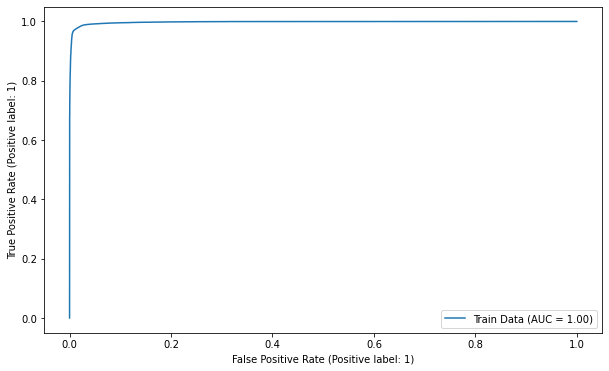

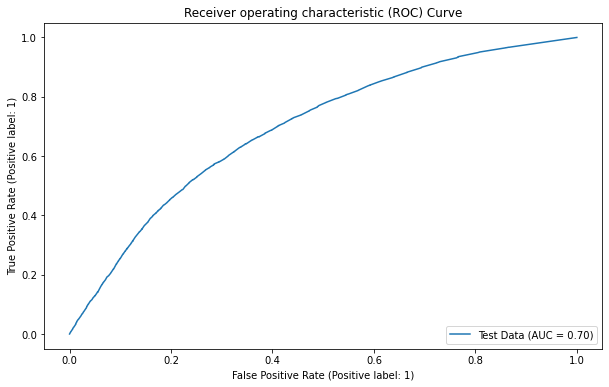

Train Accuracy...................

 0.9813438612788358

Train Confusion Matrix...........

 [[57194   937]
 [ 1232 56899]]

Test Accuracy.....................

 0.7692333333333333

Test Confusion Matrix..............

 [[21203  3685]
 [ 3238  1874]]


,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.00,NaN,NaN,0.83,0.00,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
1,Logistic Regression,0.83,0.10,0.55,0.17,0.83,0.11,0.53,0.18,0.833469,0.832214,0.834500,0.833714,0.833214,0.833702
2,Decision Tree,0.97,0.85,0.99,0.91,0.76,0.28,0.30,0.29,0.760111,0.764500,0.761500,0.757357,0.761357,0.755840
3,DecisionTree-GridSearchCV,0.84,0.10,0.62,0.17,0.84,0.10,0.61,0.17,0.835955,0.836214,0.837214,0.836071,0.836143,0.834131
4,Bagging,0.96,0.80,0.94,0.86,0.80,0.20,0.36,0.26,0.804612,0.805000,0.805500,0.803357,0.803571,0.805629
5,Random Forest,0.96,0.79,0.94,0.86,0.81,0.20,0.38,0.26,0.806354,0.804857,0.807357,0.805214,0.807286,0.807058
6,Adaptive_Boosting,0.86,0.24,0.73,0.36,0.83,0.16,0.50,0.24,0.826326,0.827000,0.825643,0.824214,0.826500,0.828273
7,Gradient_Boosting,0.84,0.10,0.68,0.17,0.84,0.10,0.65,0.17,0.837826,0.838571,0.838286,0.837571,0.838071,0.836631
8,XG_Boost,0.85,0.17,0.78,0.28,0.84,0.13,0.63,0.22,0.837341,0.837500,0.839000,0.836571,0.836714,0.836917
0,LogRegression_FeatureEng.,0.83,0.05,0.58,0.09,0.83,0.05,0.51,0.09,0.832183,0.831643,0.834000,0.832857,0.831500,0.830916


In [216]:
print('ROC curve for Random Forest Balanced Data classifier...............................................')
draw_roc(model_rf_sm, X_train_res, y_train_res, X_test, y_test)

# Train data And Test Data.......................................................................................
accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test= model_eval(model_rf_sm, X_train_res, y_train_res, X_test, y_test)
print("Train Accuracy...................\n\n", accuracy_train)
print('') 
print("Train Confusion Matrix...........\n\n",cnf_matrix_train)
print('')
print("Test Accuracy.....................\n\n",accuracy_test)
print('')
print("Test Confusion Matrix..............\n\n",cnf_matrix_test)


# Store the result ..............................................................................................

temp = store_results("RandomForest_Balanced", y_train_res, X_train_res, y_test, X_test, model_rf_sm, 5)
outcome = outcome.append(temp)
outcome 

### Adaptive Boosting With SMOTE

In [217]:
model_ada_sm = AdaBoostClassifier(random_state=1)
model_ada_sm.fit(X_train_res,y_train_res)

AdaBoostClassifier(random_state=1)

ROC curve for Adaptive Boosting Balanced Data classifier...............................................


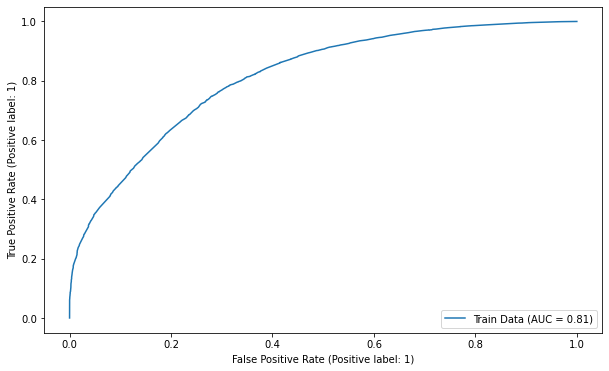

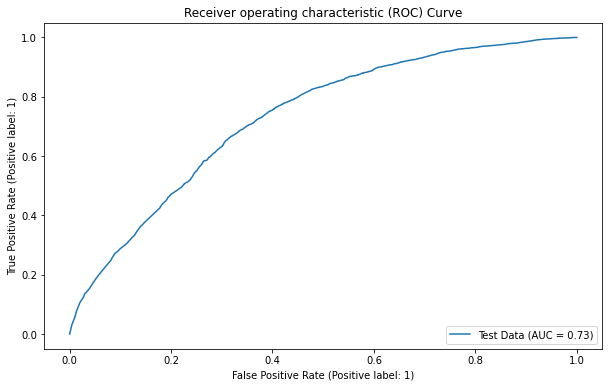

Train Accuracy...................

 0.7326125475219762

Train Confusion Matrix...........

 [[39046 19085]
 [12002 46129]]

Test Accuracy.....................

 0.6701666666666667

Test Confusion Matrix..............

 [[16626  8262]
 [ 1633  3479]]


,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.00,NaN,NaN,0.83,0.00,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
1,Logistic Regression,0.83,0.10,0.55,0.17,0.83,0.11,0.53,0.18,0.833469,0.832214,0.834500,0.833714,0.833214,0.833702
2,Decision Tree,0.97,0.85,0.99,0.91,0.76,0.28,0.30,0.29,0.760111,0.764500,0.761500,0.757357,0.761357,0.755840
3,DecisionTree-GridSearchCV,0.84,0.10,0.62,0.17,0.84,0.10,0.61,0.17,0.835955,0.836214,0.837214,0.836071,0.836143,0.834131
4,Bagging,0.96,0.80,0.94,0.86,0.80,0.20,0.36,0.26,0.804612,0.805000,0.805500,0.803357,0.803571,0.805629
5,Random Forest,0.96,0.79,0.94,0.86,0.81,0.20,0.38,0.26,0.806354,0.804857,0.807357,0.805214,0.807286,0.807058
6,Adaptive_Boosting,0.86,0.24,0.73,0.36,0.83,0.16,0.50,0.24,0.826326,0.827000,0.825643,0.824214,0.826500,0.828273
7,Gradient_Boosting,0.84,0.10,0.68,0.17,0.84,0.10,0.65,0.17,0.837826,0.838571,0.838286,0.837571,0.838071,0.836631
8,XG_Boost,0.85,0.17,0.78,0.28,0.84,0.13,0.63,0.22,0.837341,0.837500,0.839000,0.836571,0.836714,0.836917
0,LogRegression_FeatureEng.,0.83,0.05,0.58,0.09,0.83,0.05,0.51,0.09,0.832183,0.831643,0.834000,0.832857,0.831500,0.830916


In [218]:
print('ROC curve for Adaptive Boosting Balanced Data classifier...............................................')
draw_roc(model_ada_sm, X_train_res, y_train_res, X_test, y_test)

# Train data And Test Data.......................................................................................
accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test= model_eval(model_ada_sm, X_train_res, y_train_res, X_test, y_test)
print("Train Accuracy...................\n\n", accuracy_train)
print('') 
print("Train Confusion Matrix...........\n\n",cnf_matrix_train)
print('')
print("Test Accuracy.....................\n\n",accuracy_test)
print('')
print("Test Confusion Matrix..............\n\n",cnf_matrix_test)


# Store the result ..............................................................................................

temp = store_results("Adaboost_Balanced", y_train_res, X_train_res, y_test, X_test, model_ada_sm, 5)
outcome = outcome.append(temp)
outcome 

### Gradient Boosting With SMOTE

In [219]:
model_gbc_sm = GradientBoostingClassifier(random_state=1)
model_gbc_sm.fit(X_train_res,y_train_res)

GradientBoostingClassifier(random_state=1)

ROC curve for Gradient Boosting Balanced Data classifier...............................................


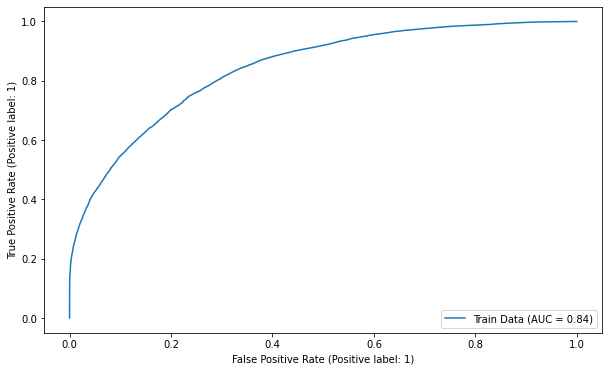

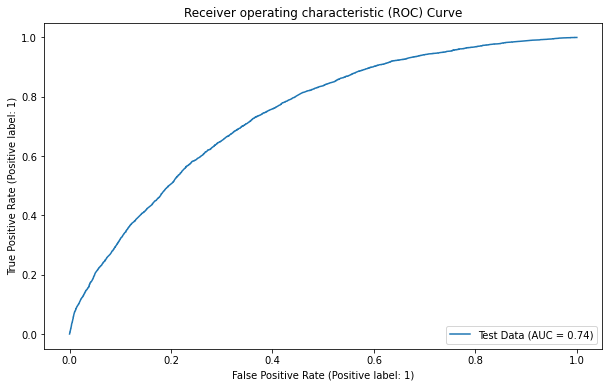

Train Accuracy...................

 0.7551478557052175

Train Confusion Matrix...........

 [[41352 16779]
 [11688 46443]]

Test Accuracy.....................

 0.6959333333333333

Test Confusion Matrix..............

 [[17576  7312]
 [ 1810  3302]]


,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.00,NaN,NaN,0.83,0.00,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
1,Logistic Regression,0.83,0.10,0.55,0.17,0.83,0.11,0.53,0.18,0.833469,0.832214,0.834500,0.833714,0.833214,0.833702
2,Decision Tree,0.97,0.85,0.99,0.91,0.76,0.28,0.30,0.29,0.760111,0.764500,0.761500,0.757357,0.761357,0.755840
3,DecisionTree-GridSearchCV,0.84,0.10,0.62,0.17,0.84,0.10,0.61,0.17,0.835955,0.836214,0.837214,0.836071,0.836143,0.834131
4,Bagging,0.96,0.80,0.94,0.86,0.80,0.20,0.36,0.26,0.804612,0.805000,0.805500,0.803357,0.803571,0.805629
5,Random Forest,0.96,0.79,0.94,0.86,0.81,0.20,0.38,0.26,0.806354,0.804857,0.807357,0.805214,0.807286,0.807058
6,Adaptive_Boosting,0.86,0.24,0.73,0.36,0.83,0.16,0.50,0.24,0.826326,0.827000,0.825643,0.824214,0.826500,0.828273
7,Gradient_Boosting,0.84,0.10,0.68,0.17,0.84,0.10,0.65,0.17,0.837826,0.838571,0.838286,0.837571,0.838071,0.836631
8,XG_Boost,0.85,0.17,0.78,0.28,0.84,0.13,0.63,0.22,0.837341,0.837500,0.839000,0.836571,0.836714,0.836917
0,LogRegression_FeatureEng.,0.83,0.05,0.58,0.09,0.83,0.05,0.51,0.09,0.832183,0.831643,0.834000,0.832857,0.831500,0.830916


In [220]:
print('ROC curve for Gradient Boosting Balanced Data classifier...............................................')
draw_roc(model_gbc_sm, X_train_res, y_train_res, X_test, y_test)

# Train data And Test Data.......................................................................................
accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test= model_eval(model_gbc_sm, X_train_res, y_train_res, X_test, y_test)
print("Train Accuracy...................\n\n", accuracy_train)
print('') 
print("Train Confusion Matrix...........\n\n",cnf_matrix_train)
print('')
print("Test Accuracy.....................\n\n",accuracy_test)
print('')
print("Test Confusion Matrix..............\n\n",cnf_matrix_test)


# Store the result ..............................................................................................

temp = store_results("GradientBoost_Balanced", y_train_res, X_train_res, y_test, X_test, model_gbc_sm, 5)
outcome = outcome.append(temp)
outcome 

### XGBoost With SMOTE

In [221]:
model_xgb_sm = xgb.XGBClassifier()
model_xgb_sm.fit(X_train_res,y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

ROC curve for XGBoosting Balanced Data classifier...............................................


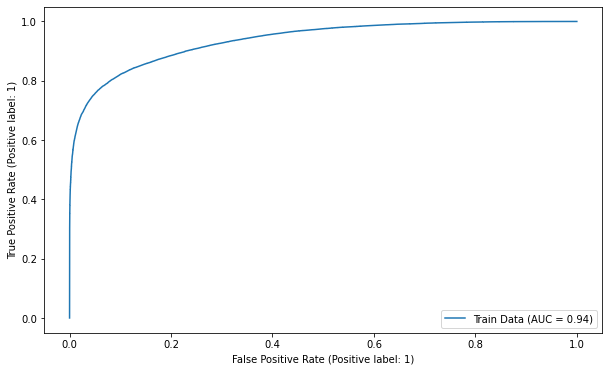

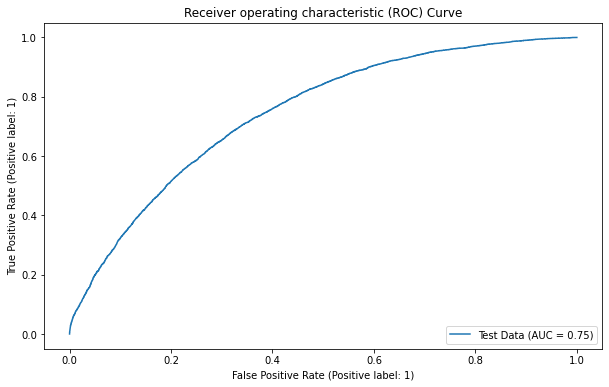

Train Accuracy...................

 0.8593349503707144

Train Confusion Matrix...........

 [[51447  6684]
 [ 9670 48461]]

Test Accuracy.....................

 0.7867333333333333

Test Confusion Matrix..............

 [[21606  3282]
 [ 3116  1996]]


,Model,Accuracy_train,recall_train,precision_train,F1_score_train,Accuracy_test,recall_test,precision_test,F1_score_test,CrossVal_Mean,CrossVal1,CrossVal2,CrossVal3,CrossVal4,CrossVal5
0,Dummy_Classifier,0.83,0.00,NaN,NaN,0.83,0.00,NaN,NaN,0.830198,0.830214,0.830214,0.830214,0.830143,0.830202
1,Logistic Regression,0.83,0.10,0.55,0.17,0.83,0.11,0.53,0.18,0.833469,0.832214,0.834500,0.833714,0.833214,0.833702
2,Decision Tree,0.97,0.85,0.99,0.91,0.76,0.28,0.30,0.29,0.760111,0.764500,0.761500,0.757357,0.761357,0.755840
3,DecisionTree-GridSearchCV,0.84,0.10,0.62,0.17,0.84,0.10,0.61,0.17,0.835955,0.836214,0.837214,0.836071,0.836143,0.834131
4,Bagging,0.96,0.80,0.94,0.86,0.80,0.20,0.36,0.26,0.804612,0.805000,0.805500,0.803357,0.803571,0.805629
5,Random Forest,0.96,0.79,0.94,0.86,0.81,0.20,0.38,0.26,0.806354,0.804857,0.807357,0.805214,0.807286,0.807058
6,Adaptive_Boosting,0.86,0.24,0.73,0.36,0.83,0.16,0.50,0.24,0.826326,0.827000,0.825643,0.824214,0.826500,0.828273
7,Gradient_Boosting,0.84,0.10,0.68,0.17,0.84,0.10,0.65,0.17,0.837826,0.838571,0.838286,0.837571,0.838071,0.836631
8,XG_Boost,0.85,0.17,0.78,0.28,0.84,0.13,0.63,0.22,0.837341,0.837500,0.839000,0.836571,0.836714,0.836917
0,LogRegression_FeatureEng.,0.83,0.05,0.58,0.09,0.83,0.05,0.51,0.09,0.832183,0.831643,0.834000,0.832857,0.831500,0.830916


In [222]:
print('ROC curve for XGBoosting Balanced Data classifier...............................................')
draw_roc(model_xgb_sm, X_train_res, y_train_res, X_test, y_test)

# Train data And Test Data.......................................................................................
accuracy_train, cnf_matrix_train, accuracy_test, cnf_matrix_test= model_eval(model_xgb_sm, X_train_res, y_train_res, X_test, y_test)
print("Train Accuracy...................\n\n", accuracy_train)
print('') 
print("Train Confusion Matrix...........\n\n",cnf_matrix_train)
print('')
print("Test Accuracy.....................\n\n",accuracy_test)
print('')
print("Test Confusion Matrix..............\n\n",cnf_matrix_test)


# Store the result ..............................................................................................

temp = store_results("XGBoost_Balanced", y_train_res, X_train_res, y_test, X_test, model_xgb_sm, 5)
outcome = outcome.append(temp)
outcome 

# STEP 5. Insights and Conclusion

## FINAL OBSERVATIONS :

The feature engineering techniques and sampling strategies were some of the key parameter tuning steps that helped improve the
overall performance of the research. This model seems to have 

#### Logistic Regression : 
One important thing to note when using this algorithm remove the correlated features to avoid the over fitting or under fitting of the trained model . This has been used for finding linear relationships and explainability. This model seems to have low accuracy , precision and recall as compared to the Other models.
    
#### Decision Trees :     
ROC AUC indicates that the decision tree model is able to classify strictly between the positive and negative data points, click vs no click in this case. As indicated in the confusion matrix, the model has a very good precision but is inefficient with the recall bench marking strategy. The Grid Search on decision Trees seemed to improve the balance on Test train validation . This has been used for finding non-linear relationships and explainability
 

####  Ensembles Random Forests & Boosting : Best of choice for below reasons
 Random Forest algorithm selects different set of features and if we look closely at the implementation of the Random Forest, it could intuitively figure out which of the features that are used as the parameters for the training are strong candidates for the prediction of the target variables. This way, the ensembles models is able to learn the importance of any feature relatively. The results of the Bagging & Boosting technique are better balanced as they help in reducing the Bias and Variance respectively. The ensemble model when trained using imbalanced and  balanced data gave the overall best result.  We could also tune the model user the hyper parameters and max features to be used. Here the models were build with focus on High predictability rather than interpretation.

## CONCLUSION: 
In Case of this assignment given access to all the anonymized variables, noise in the data can be perfectly removed. We could tune the parameters wisely which could help us solve the more complex problem of choosing the right advertisement at the right time for a user. Intepretability thus is not prime importance .   

Hence since as the categories and data available is anonymized we prefer the use of Ensembles Techniques (Bagging, Random Forest, Boosting) with Feature Engineering to get the best possible feature selection and take a wise decision on bias and variance Trade-off to avoid overfitting and underfitting. 

When using each of the above discussed classifier for the prediction, we see that all the classifiers predict the non-clicks better than the clicks due to the imbalance in the data. Additionally, it is also observed that data points are the mis predicted by one model is predicted rightly by other models. 
